In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
pd.set_option("display.max_rows", None)


In [4]:
data_train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Проведем EDA анализ.

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
print('Кол-во пропусков: data_train:\n', data_train.isnull().sum())

Кол-во пропусков: data_train:
 Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2

In [7]:
data_train.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

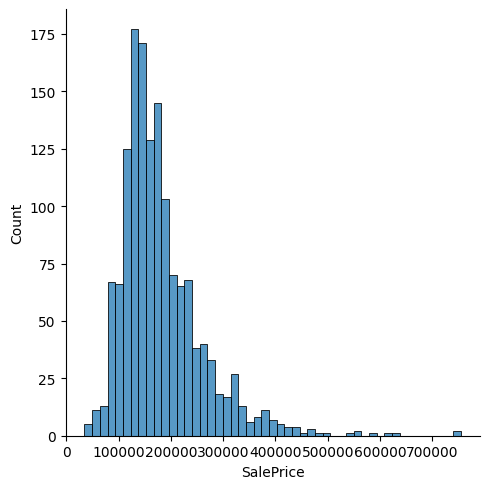

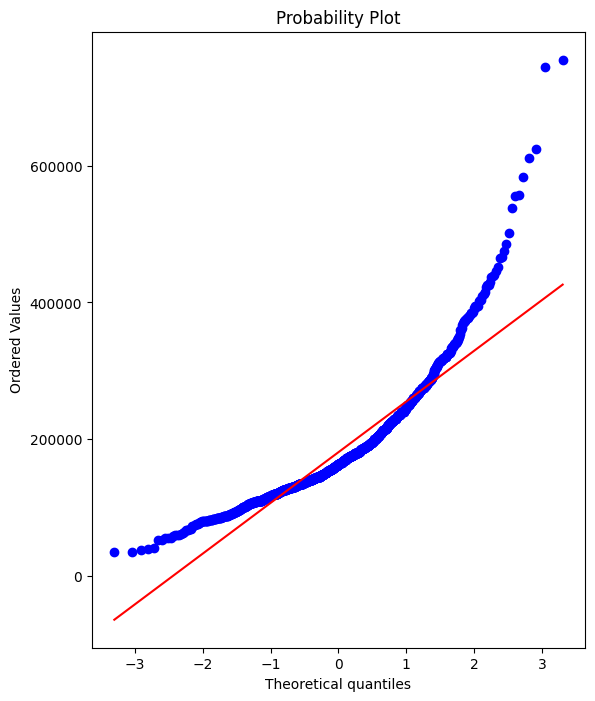

In [8]:
sns.displot(data_train['SalePrice'])
# Распределение на необработанных данных
fig = plt.figure(figsize = (14,8))
fig.add_subplot(1,2,1)
res = stats.probplot(data_train['SalePrice'], plot=plt)

Как видно распределение не равномерное

In [9]:
print('Средняя цена продажи',  data_train['SalePrice'].mean())
print('Медианная цена продажи', data_train['SalePrice'].median())

Средняя цена продажи 180921.19589041095
Медианная цена продажи 163000.0


Логарифмируем чтобы привести распределение в нормальный вид

In [10]:
data_train['SalePrice'] = np.log(data_train['SalePrice'] + 1)

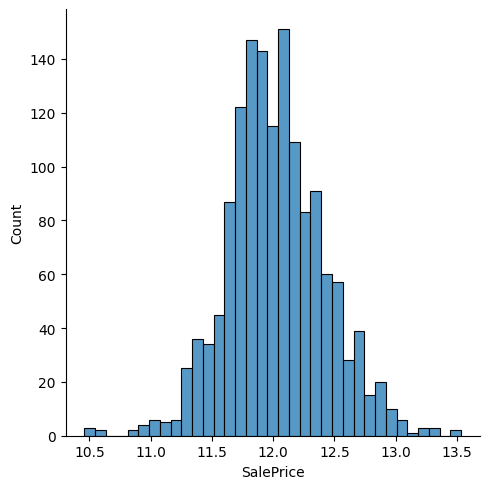

In [11]:
sns.displot(data_train['SalePrice'])

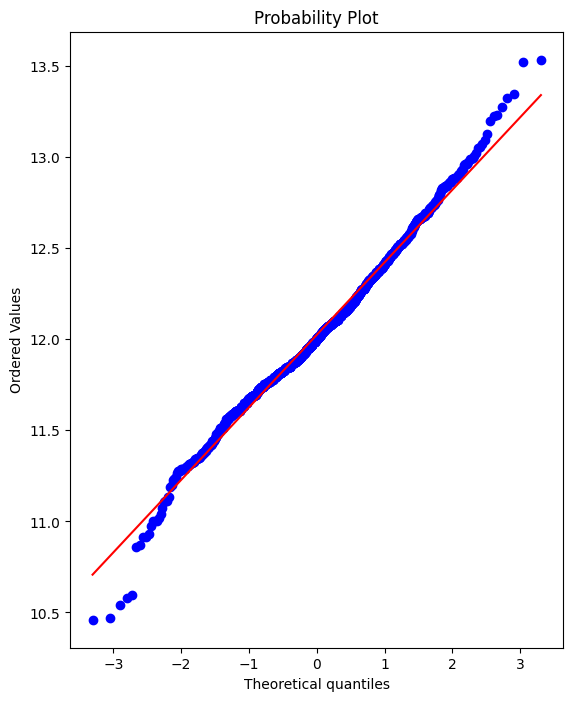

In [12]:
fig = plt.figure(figsize = (14,8))
fig.add_subplot(1,2,1)
res = stats.probplot(data_train['SalePrice'], plot=plt)

Метод исправил ситуацию

Распределим все ячейки

In [13]:
cat_cols = ['MSZoning','Street','Alley','LandContour','Utilities','LotConfig','Neighborhood','Condition1','Condition2',
           'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating',
           'CentralAir','Electrical', 'Functional',
           'LotShape','LandSlope', 'ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
           'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence',
           'GarageType', 'PavedDrive','MiscFeature','SaleType','SaleCondition']
numeric_cols = ['MSSubClass', 'OverallQual', 'OverallQual', 'YearBuilt','YearRemodAdd', 'OverallCond', 'LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                '3SsnPorch','ScreenPorch','PoolArea','MiscVal', 'BsmtFullBath', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']
null = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

Построим heatmap для просмотра кореляции между numeric переменными и SalePrice

In [14]:
numeric_sale = ['SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

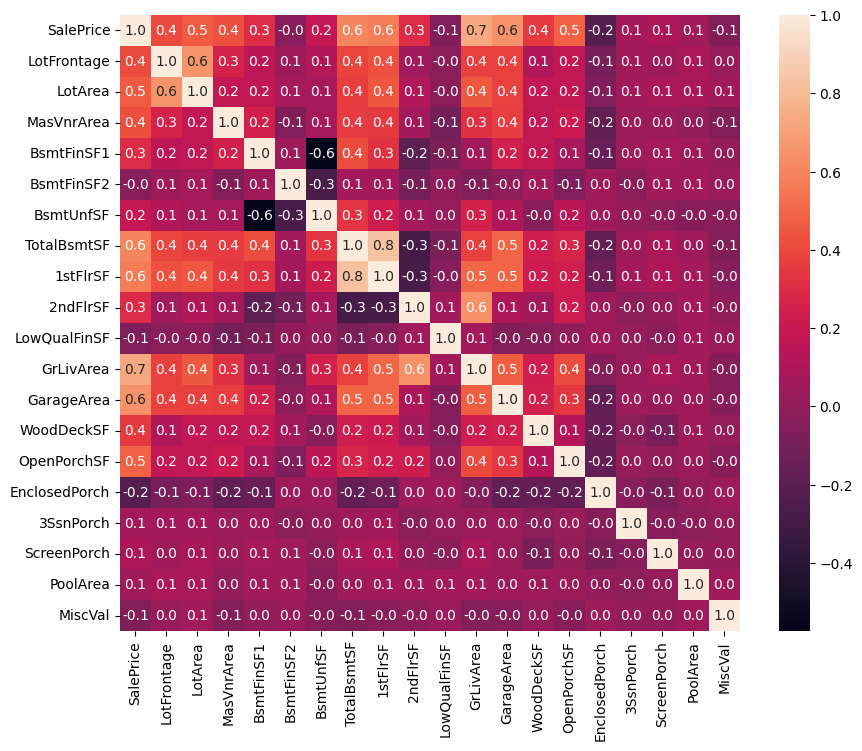

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_train[numeric_sale].corr(method='spearman'), annot=True, fmt=".1f");

Кореляция есть практически у всех переменных с целевой. 

Сейчас просмотрим все категории, и удалим лишние колонки.

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


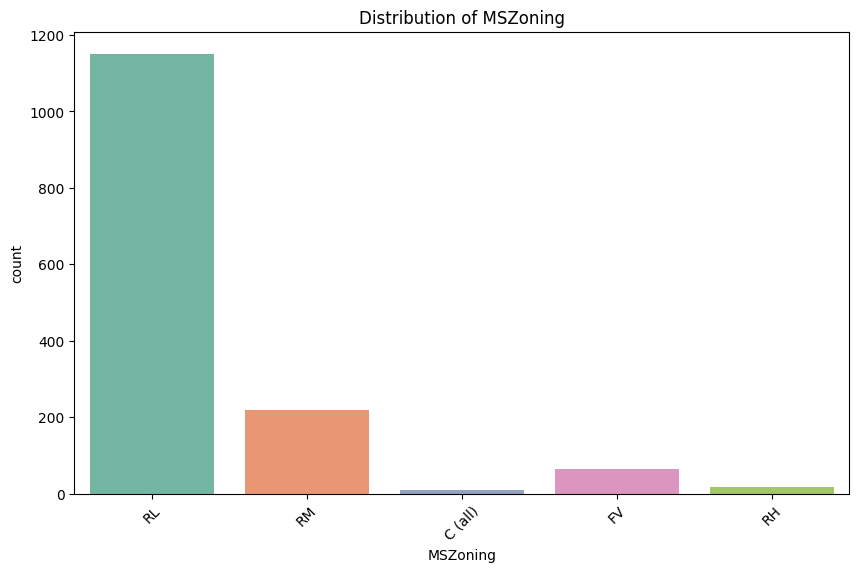

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


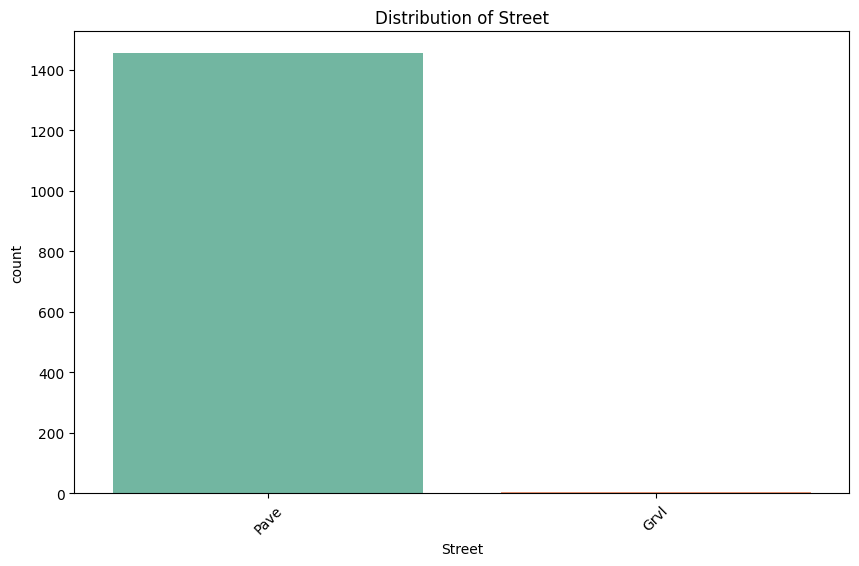

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


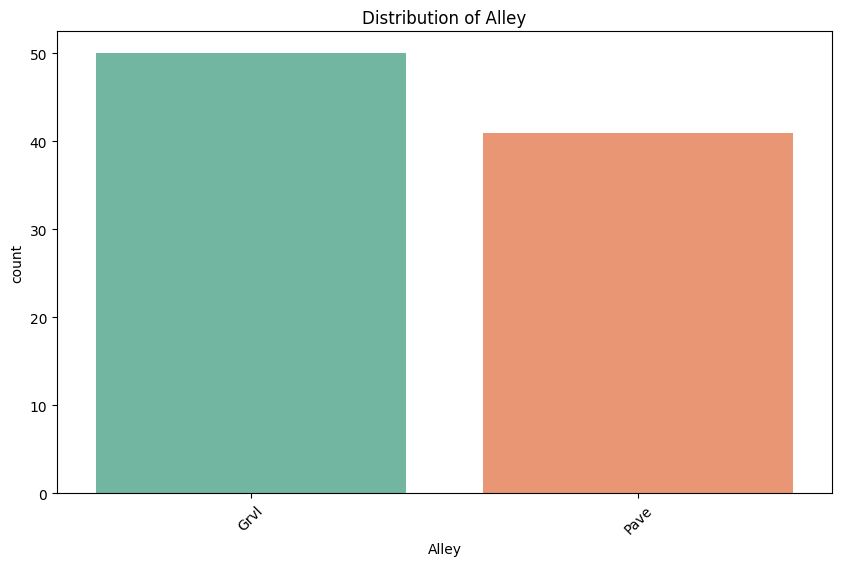

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


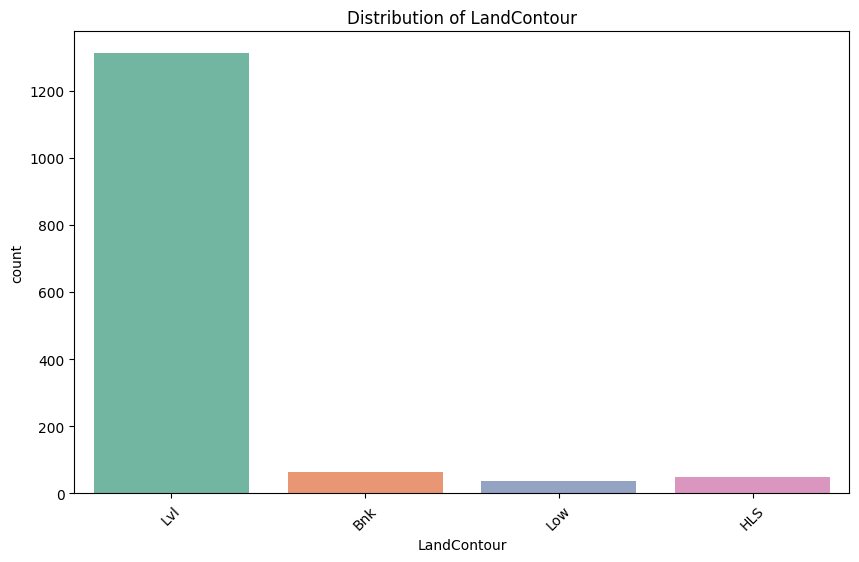

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


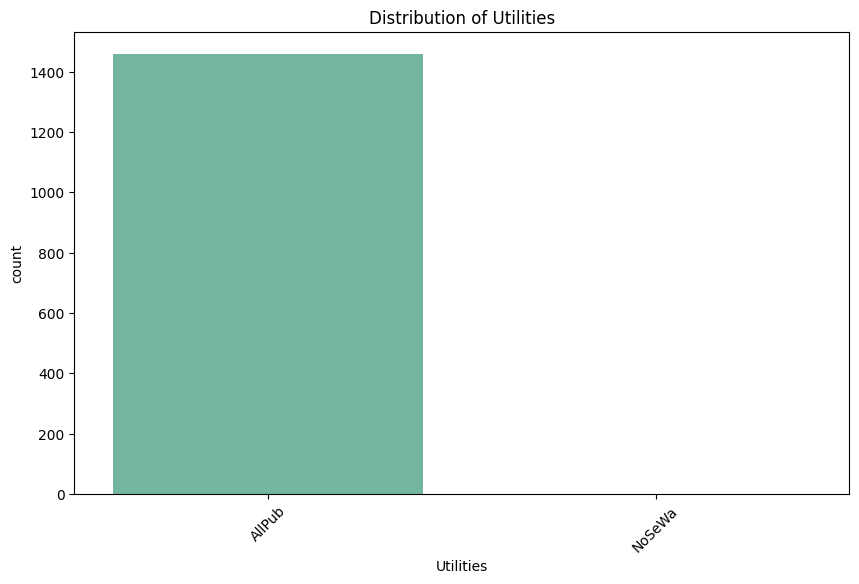

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


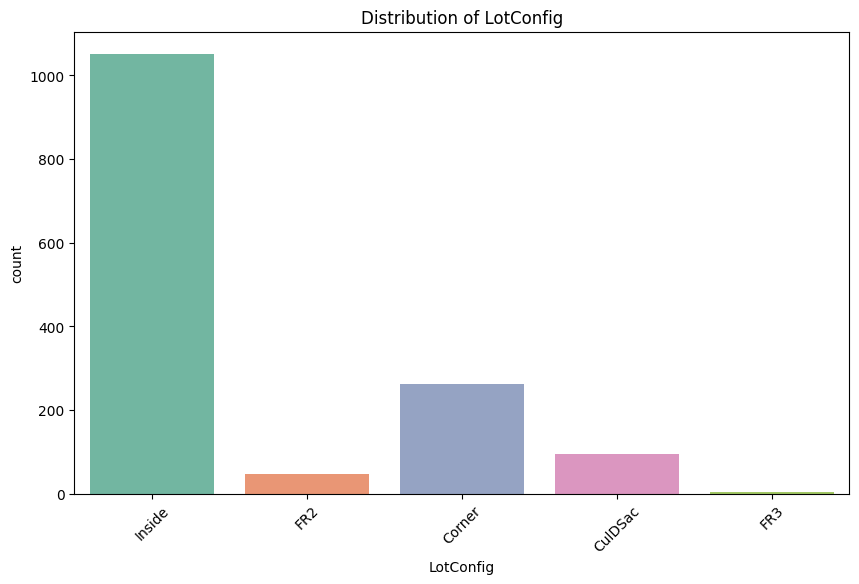

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


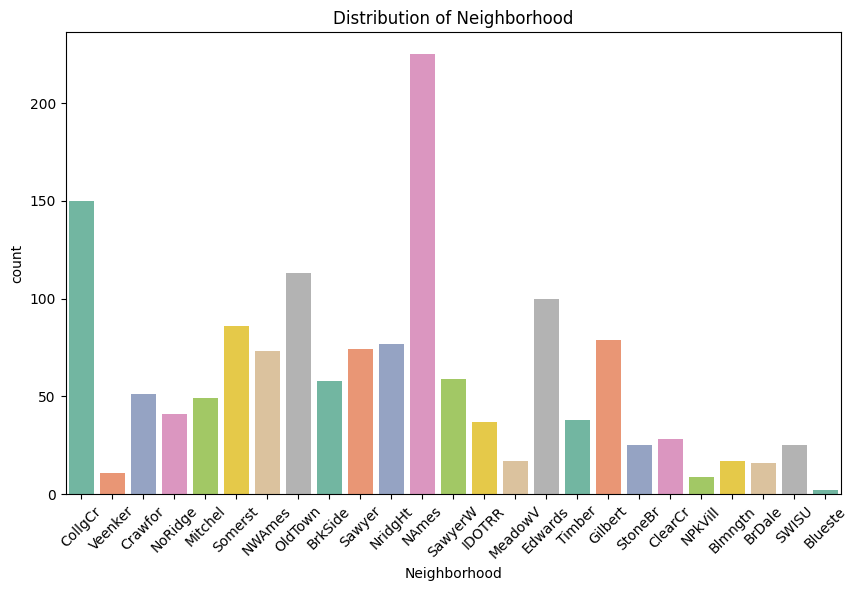

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


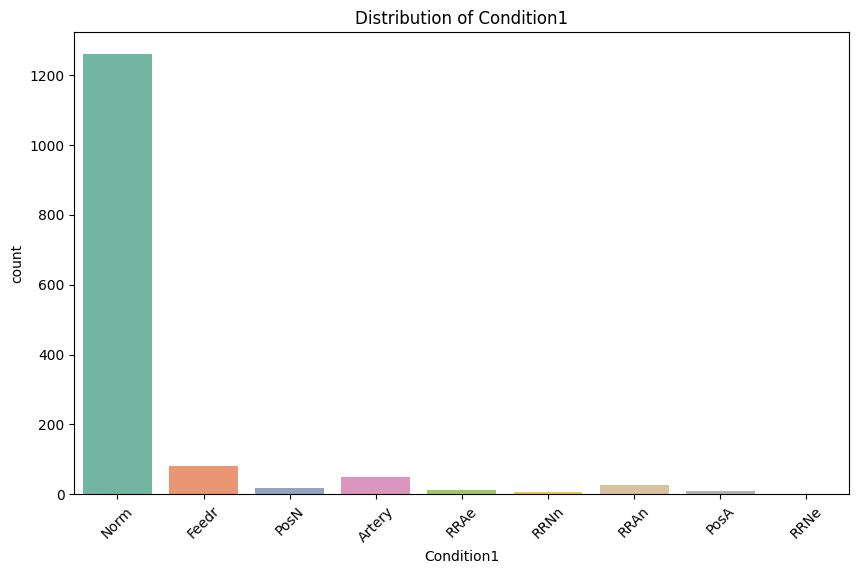

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


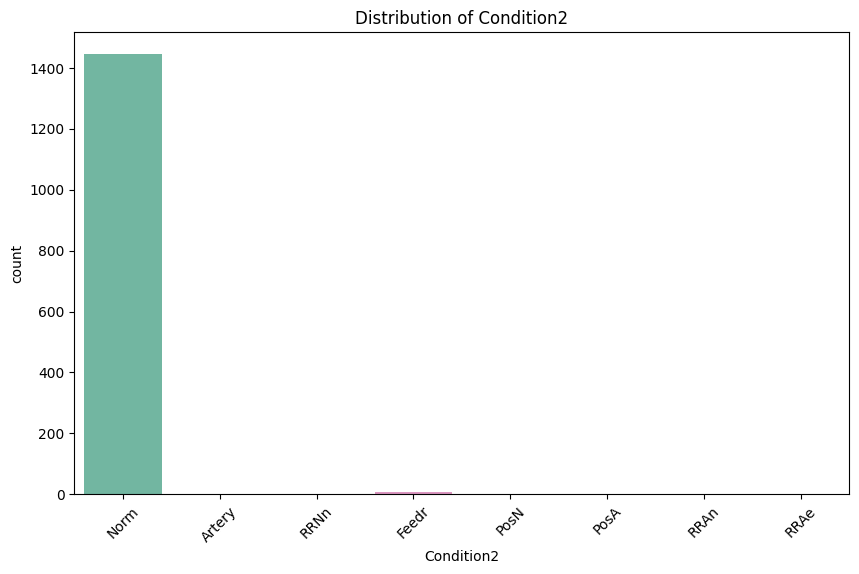

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


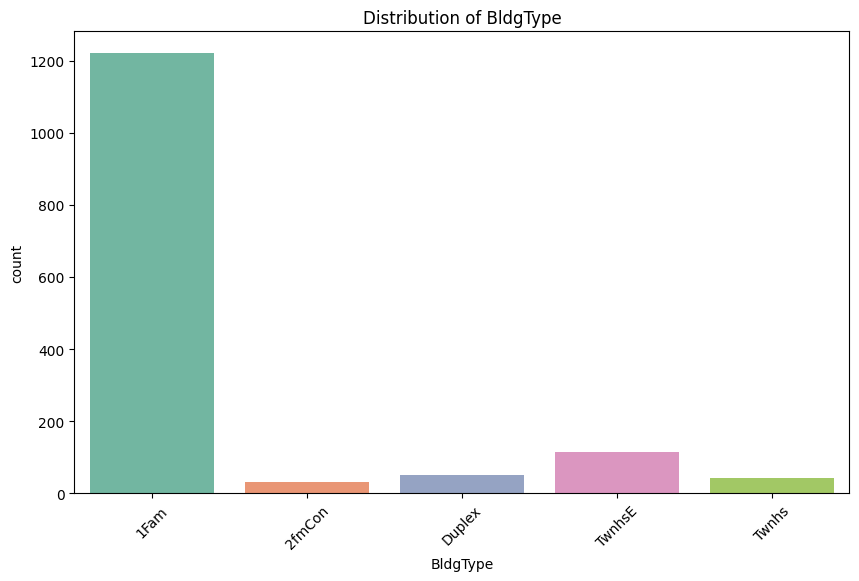

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


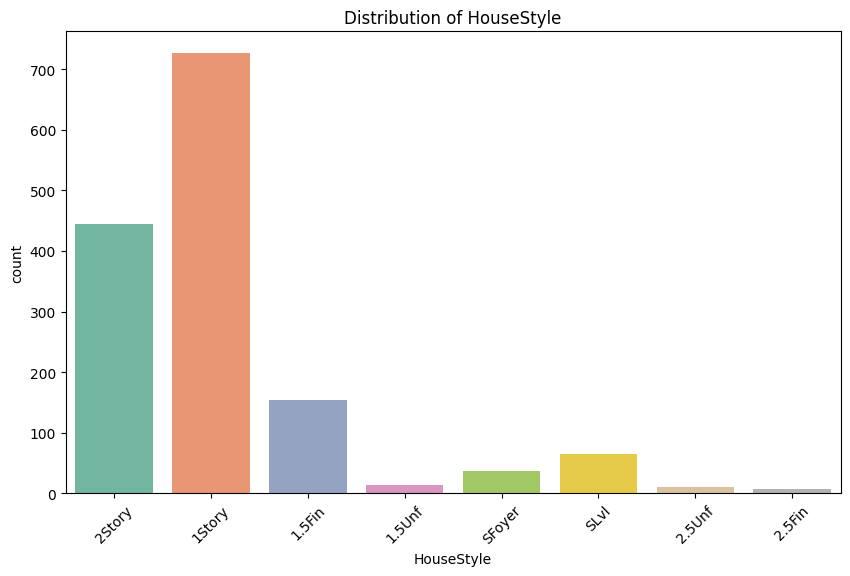

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


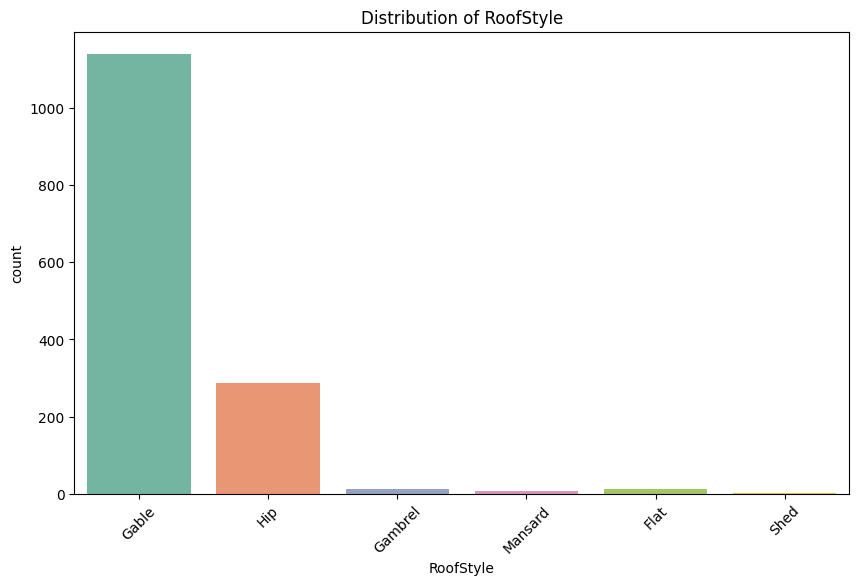

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


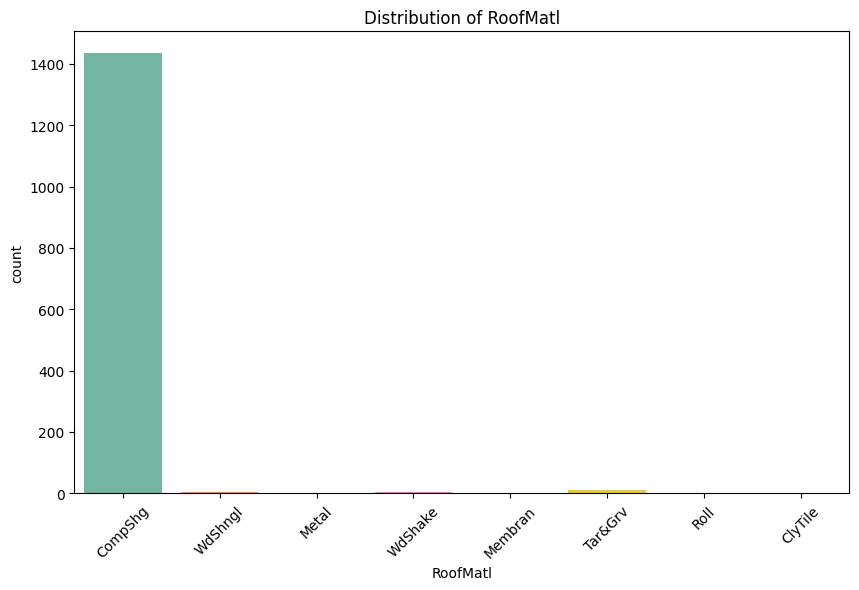

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


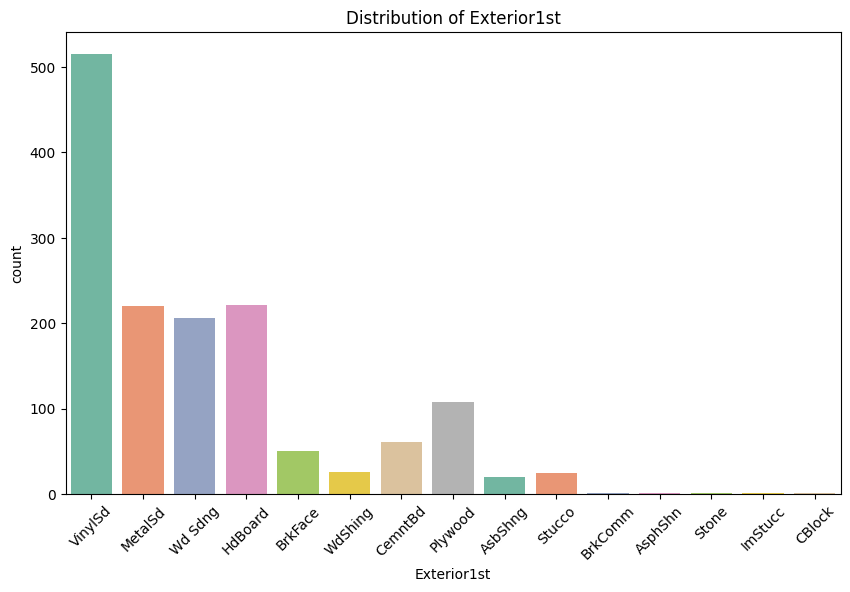

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


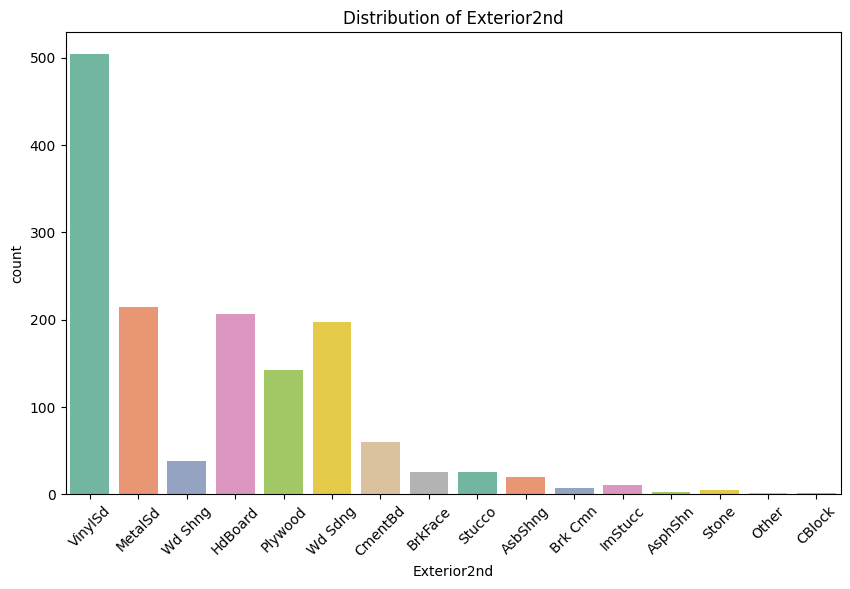

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


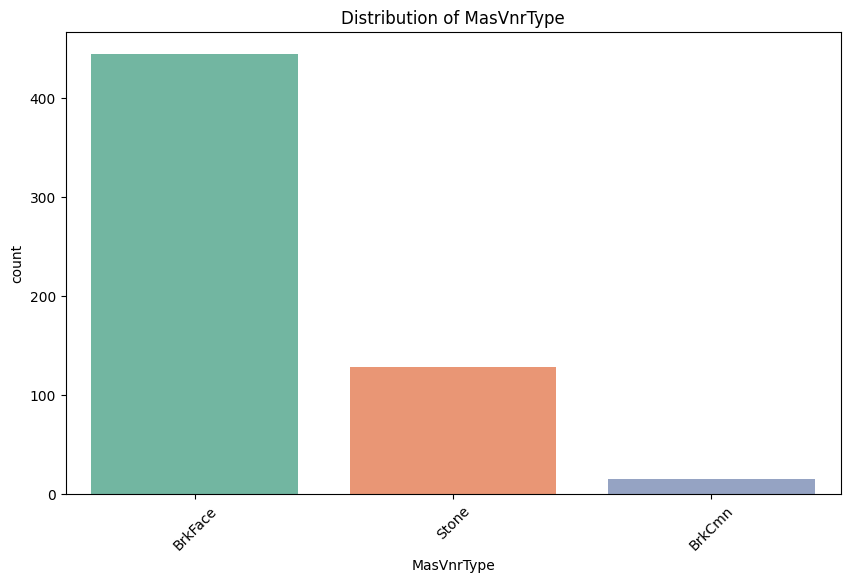

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


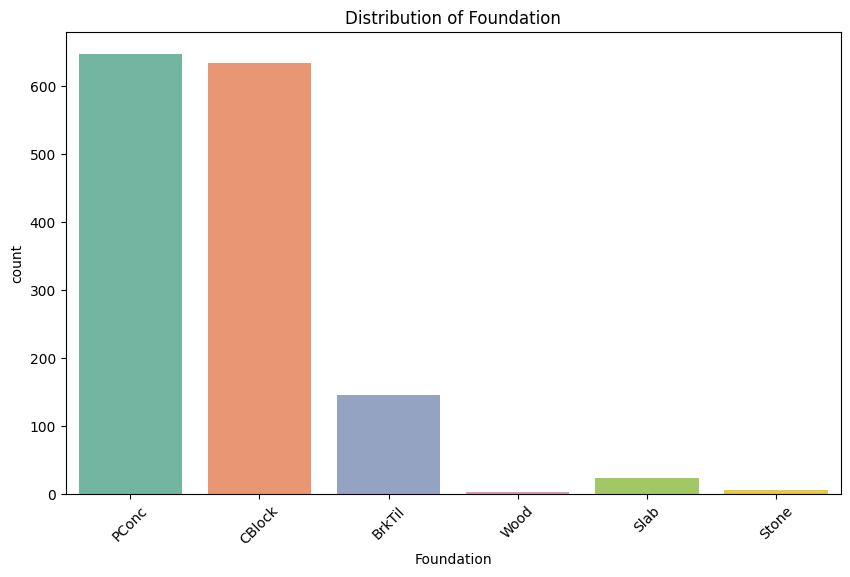

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


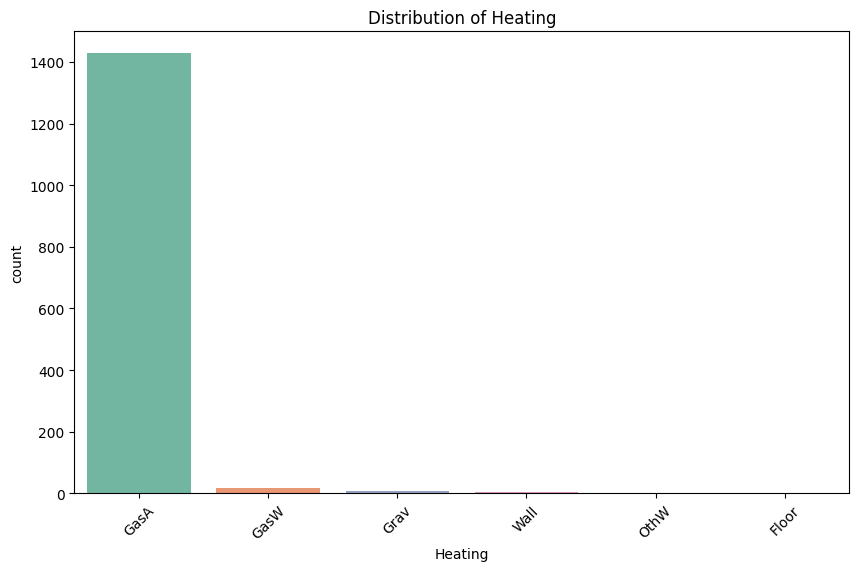

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


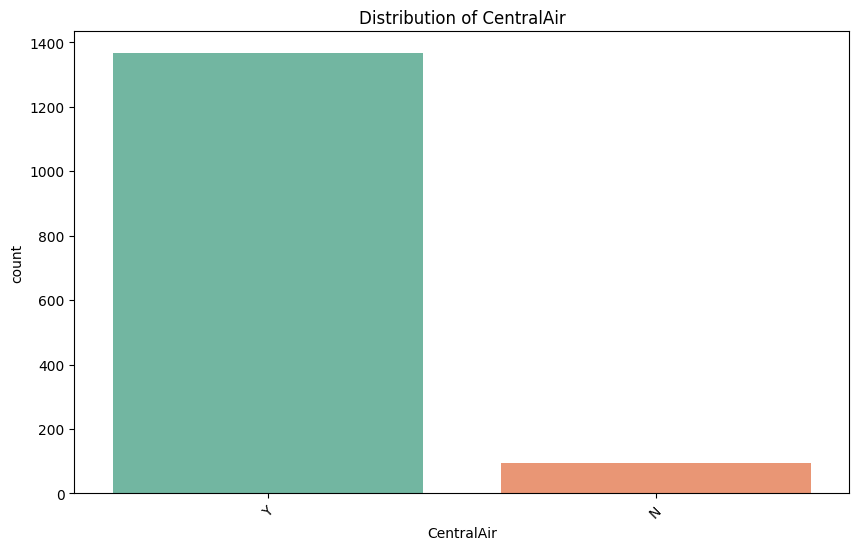

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


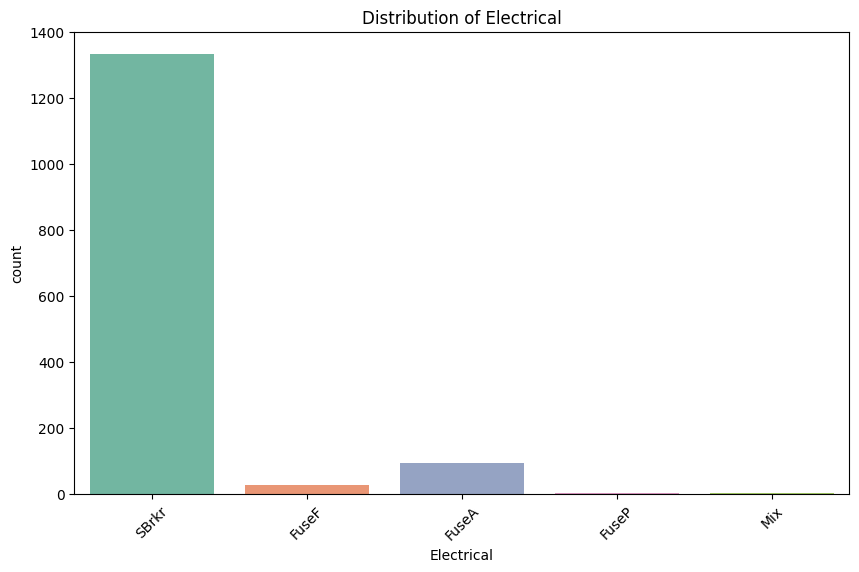

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


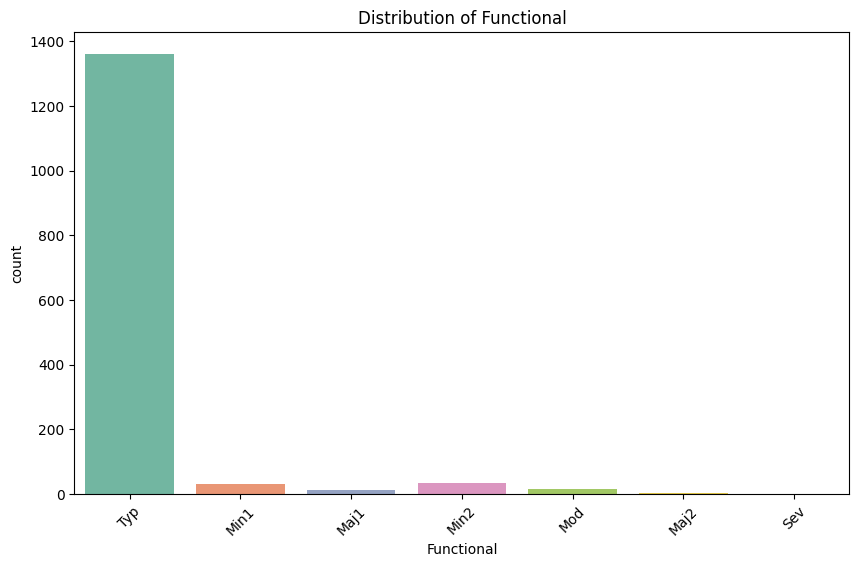

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


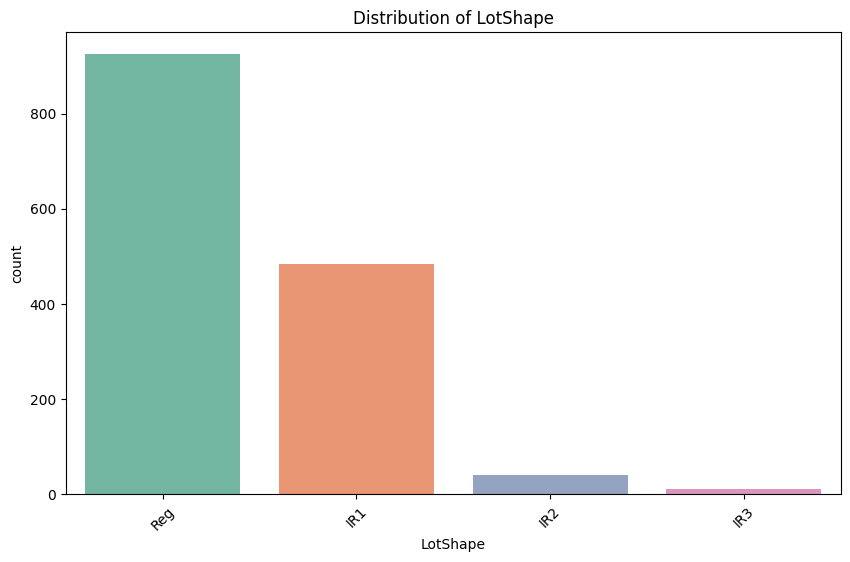

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


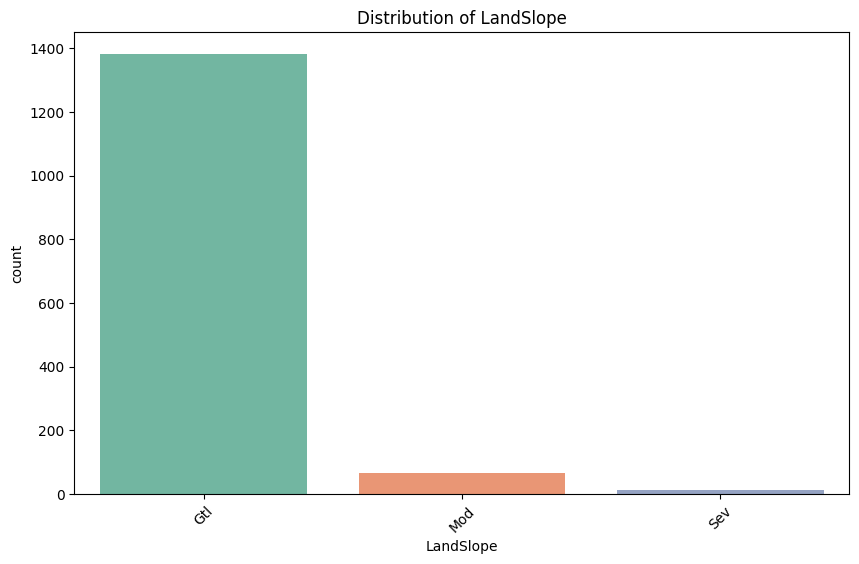

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


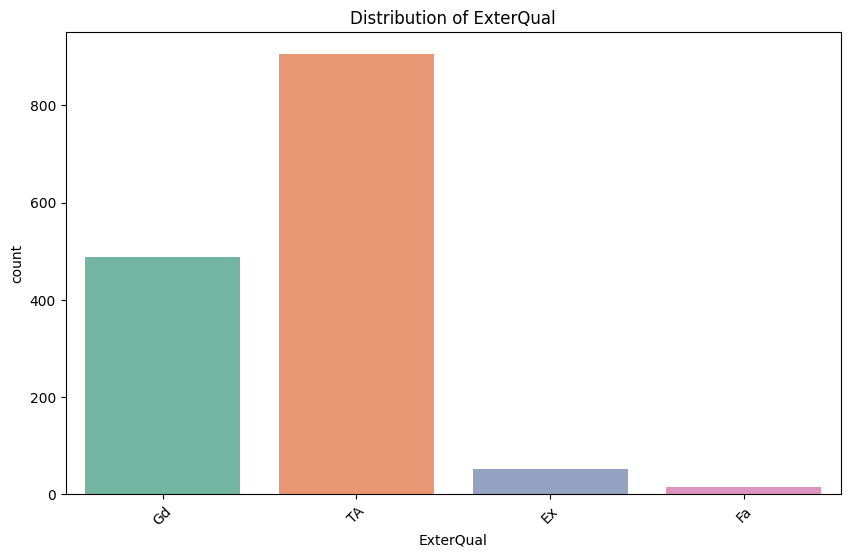

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


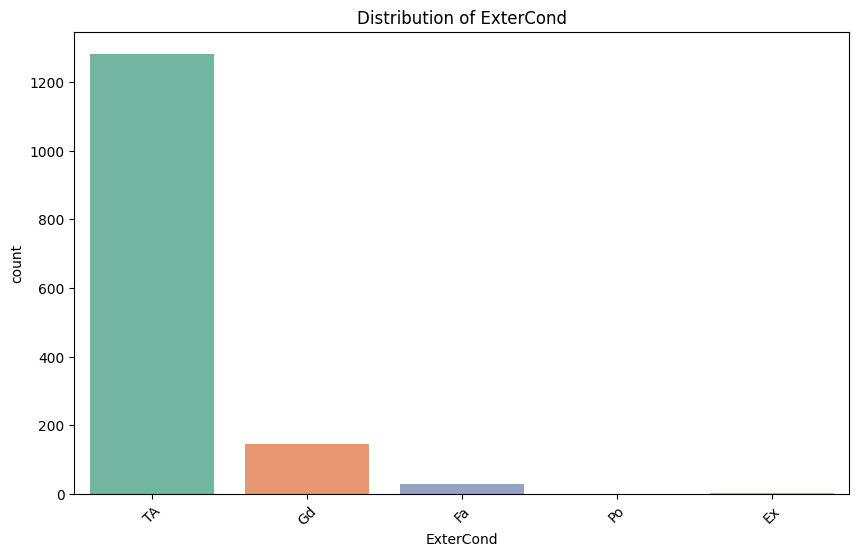

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


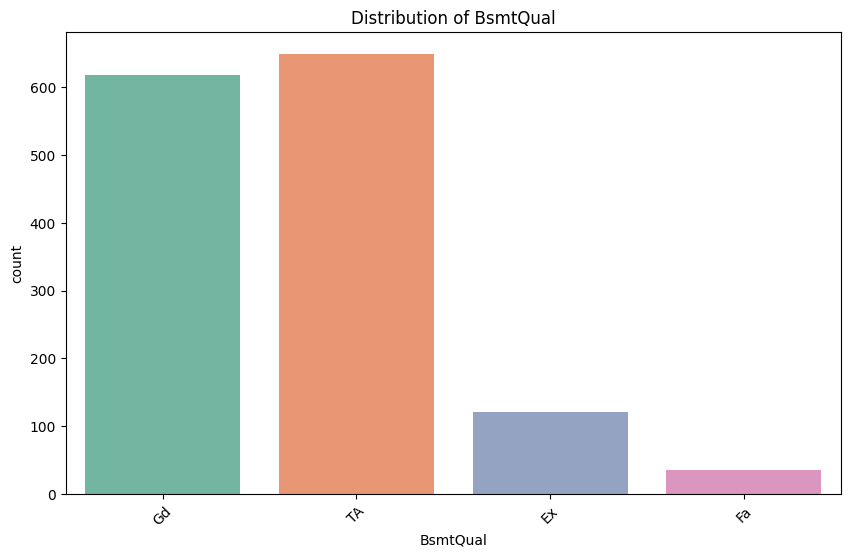

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


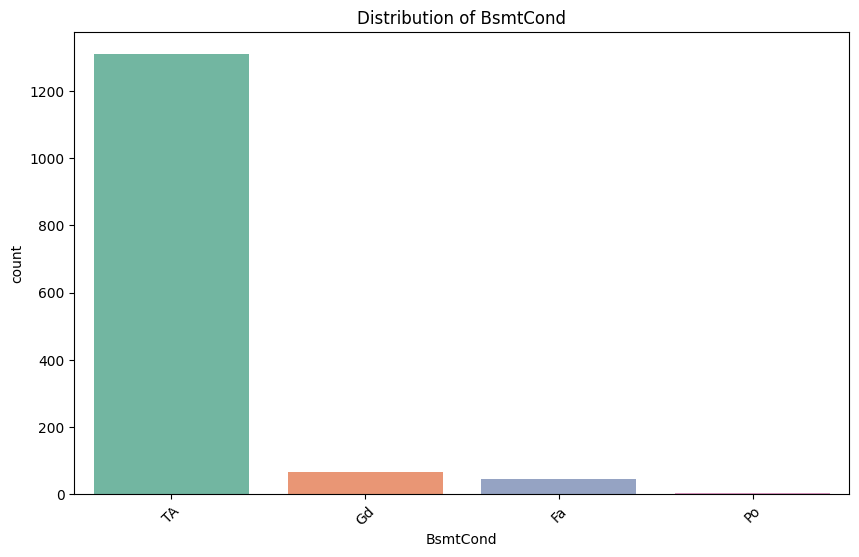

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


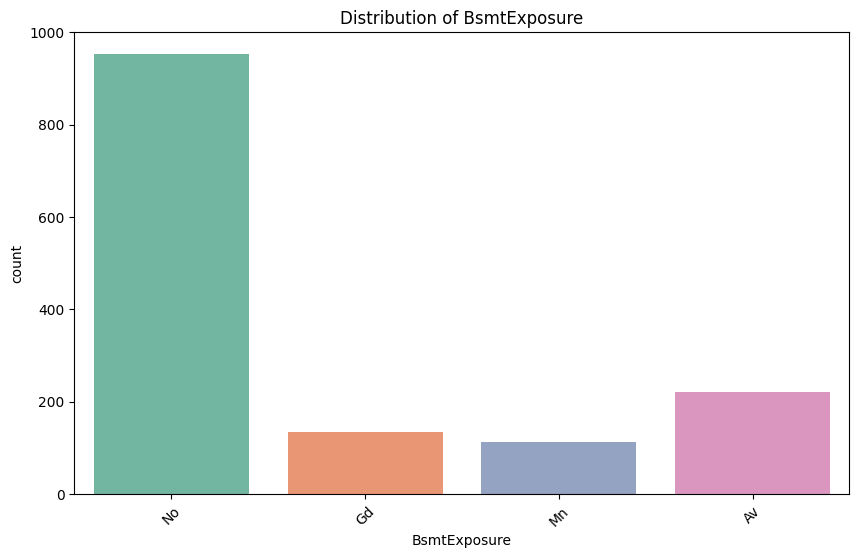

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


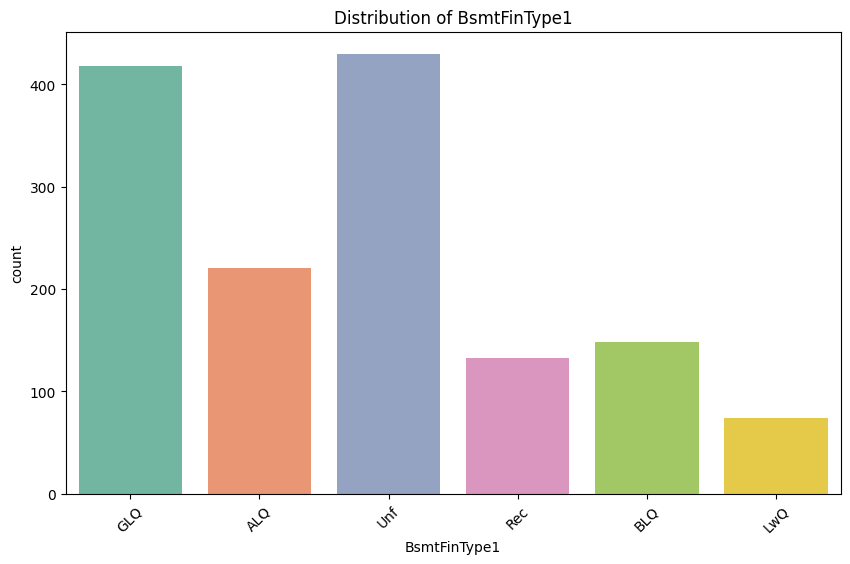

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


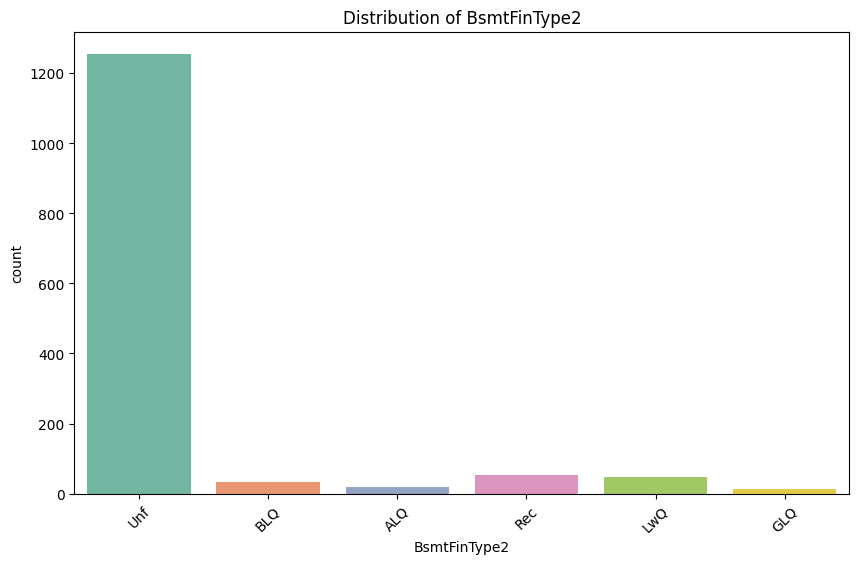

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


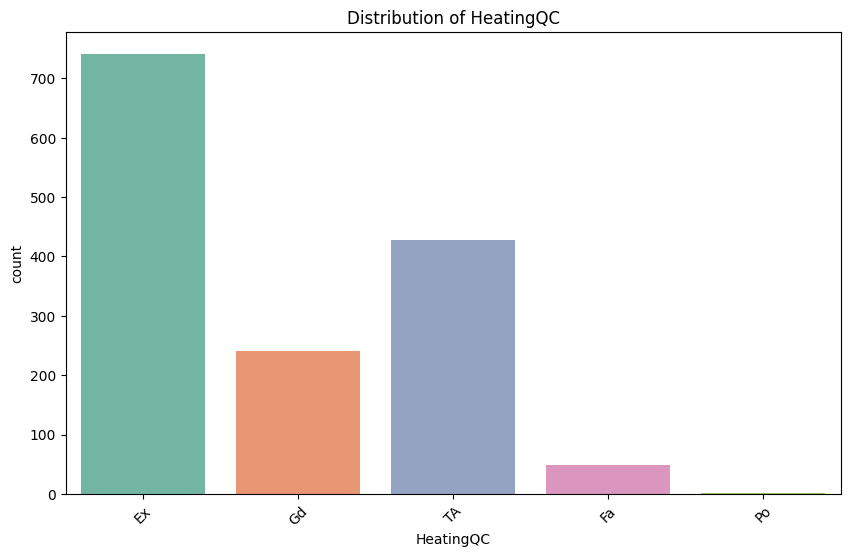

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


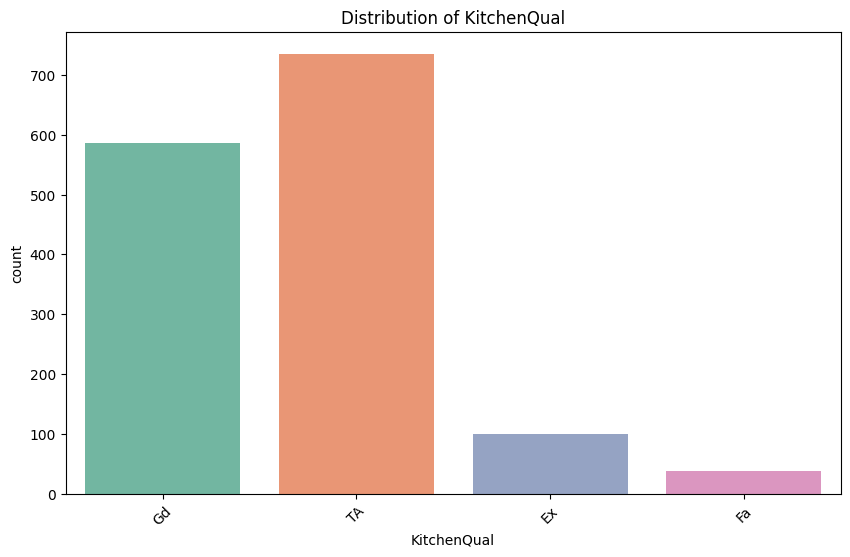

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


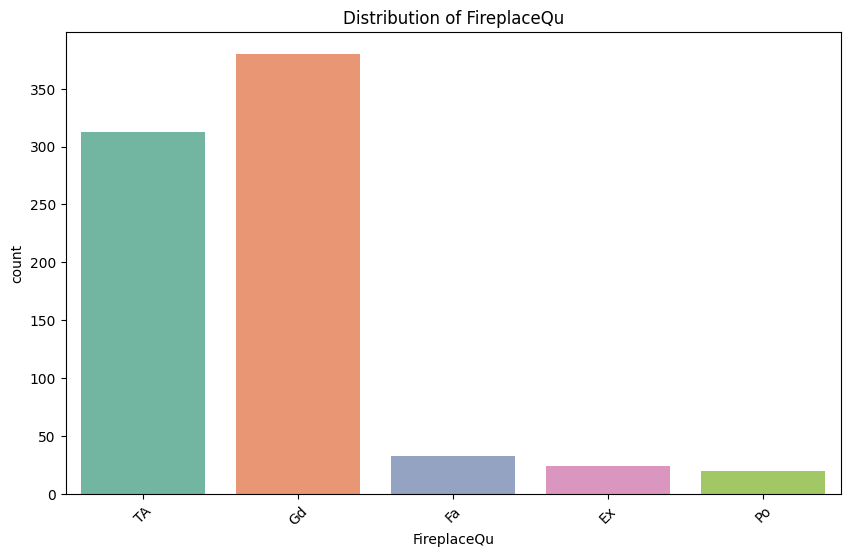

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


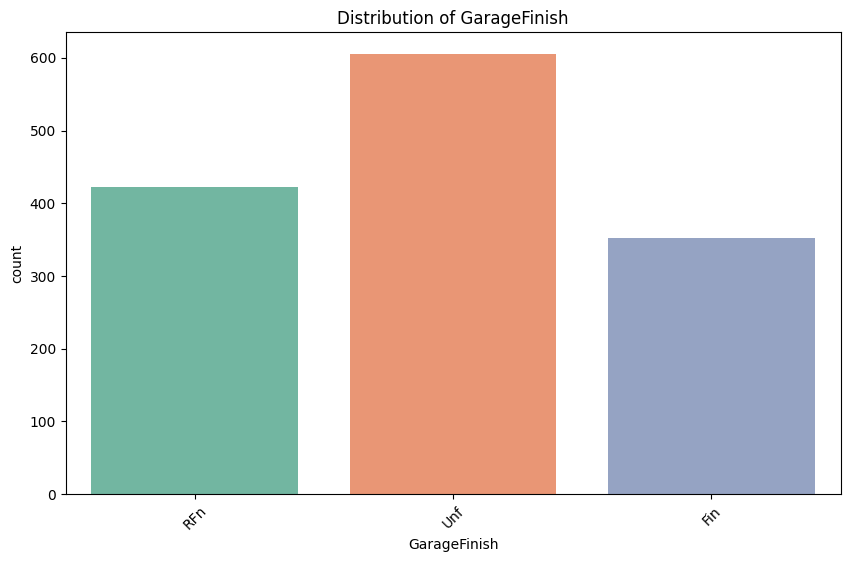

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


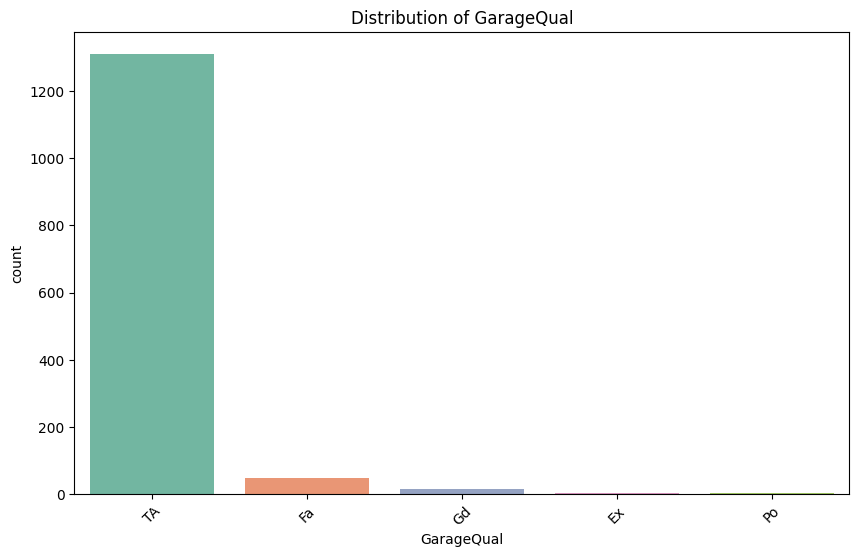

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


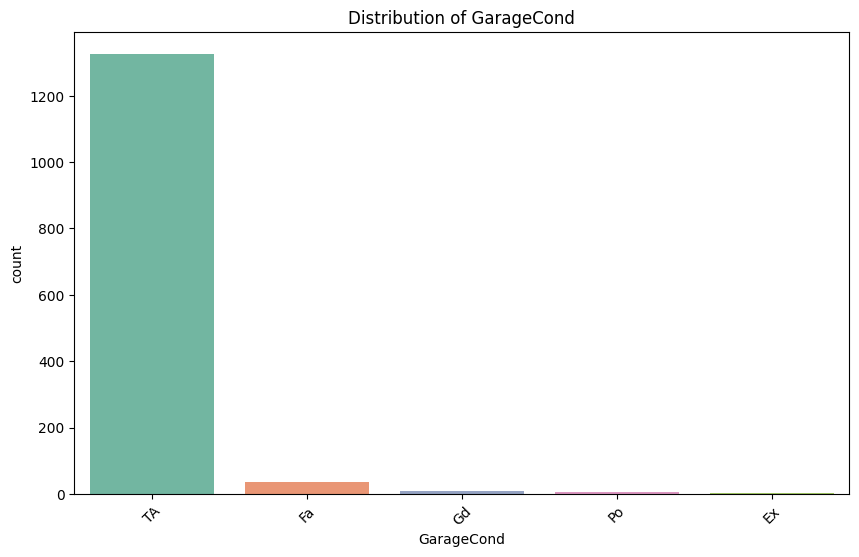

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


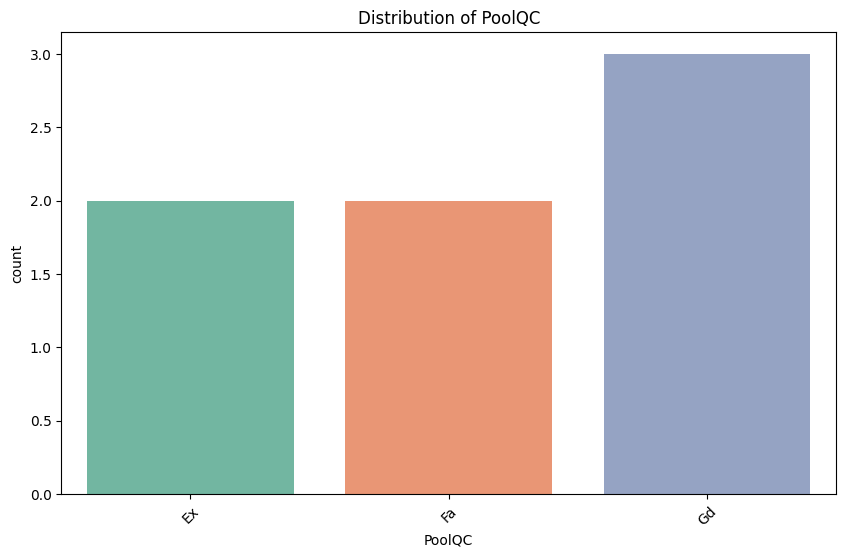

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


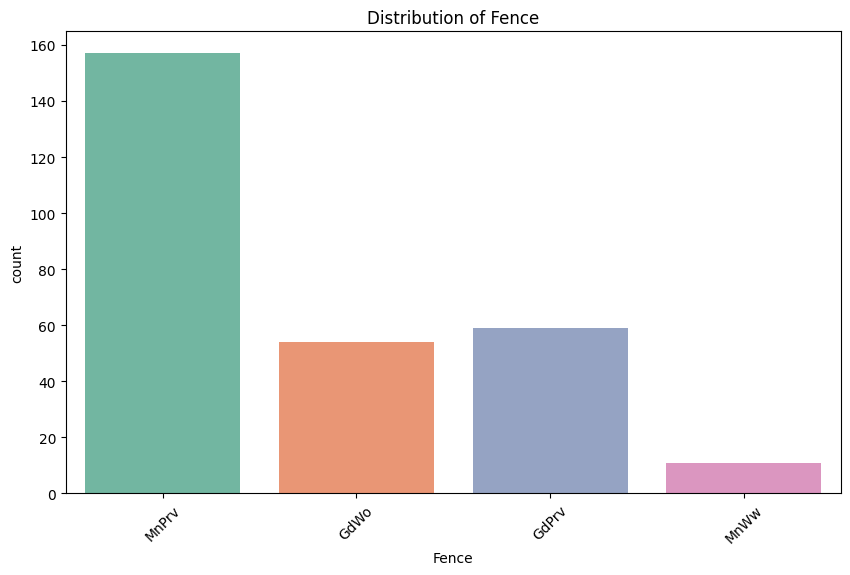

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


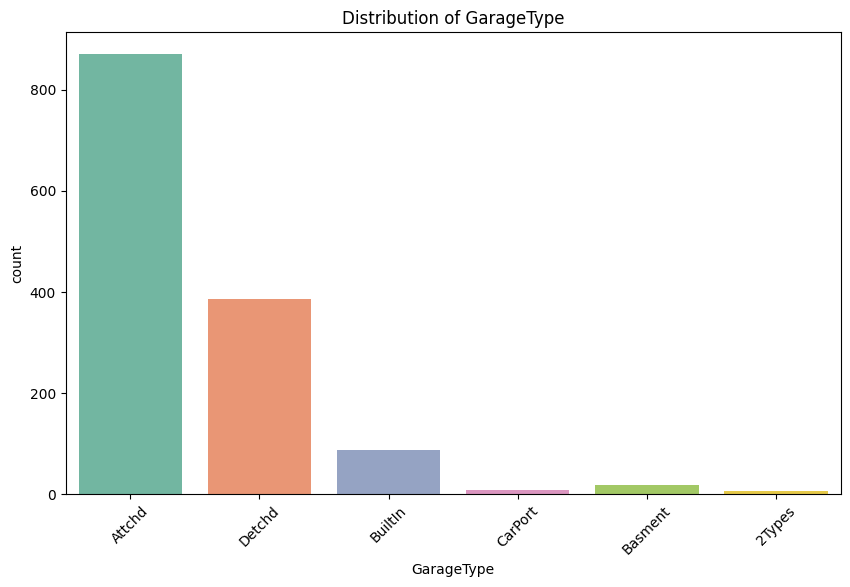

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


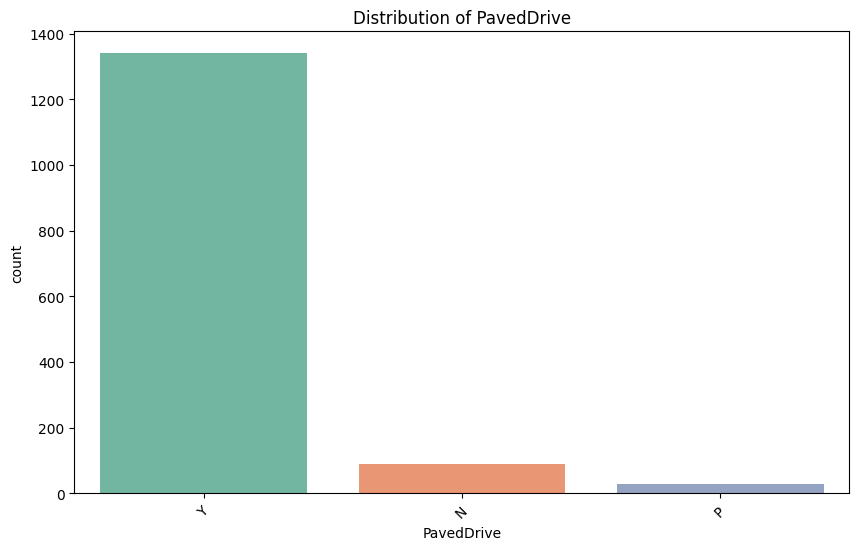

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


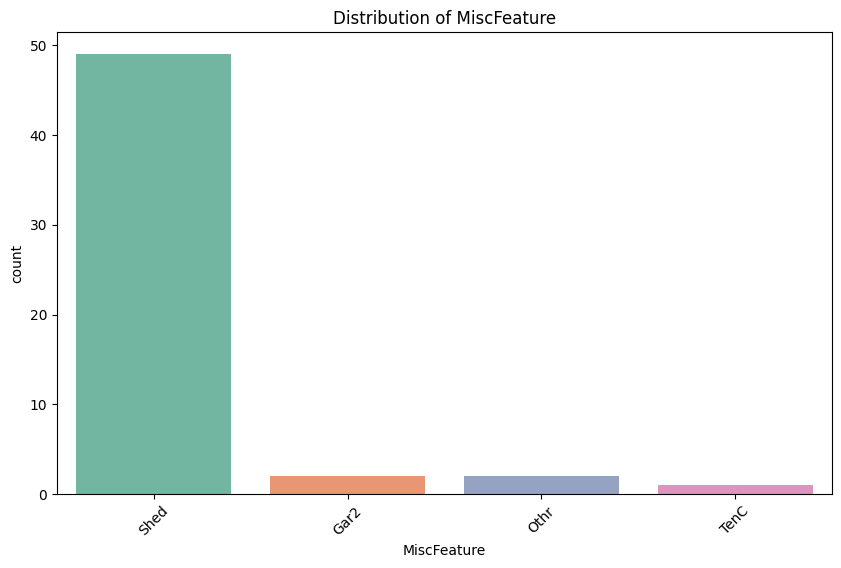

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


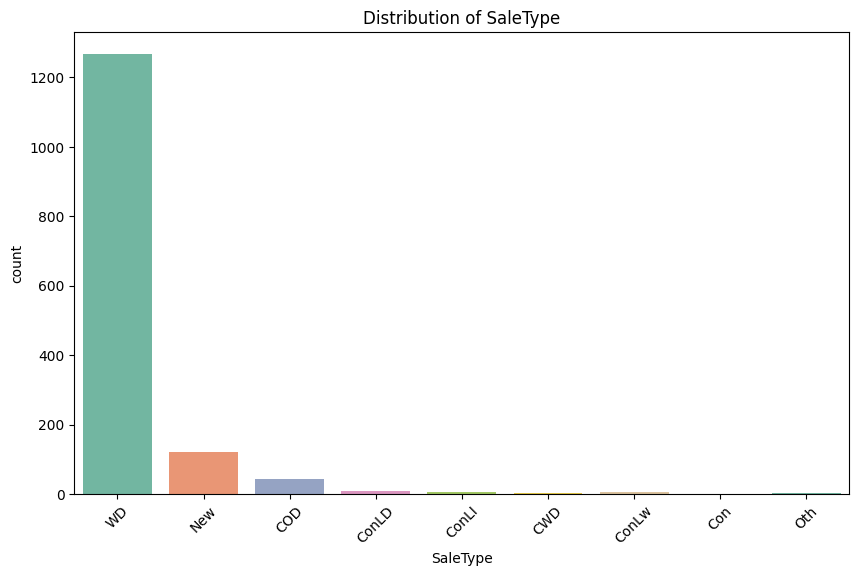

C:\Users\Илья\AppData\Local\Temp\ipykernel_26056\203025521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_train, palette='Set2', legend=False)


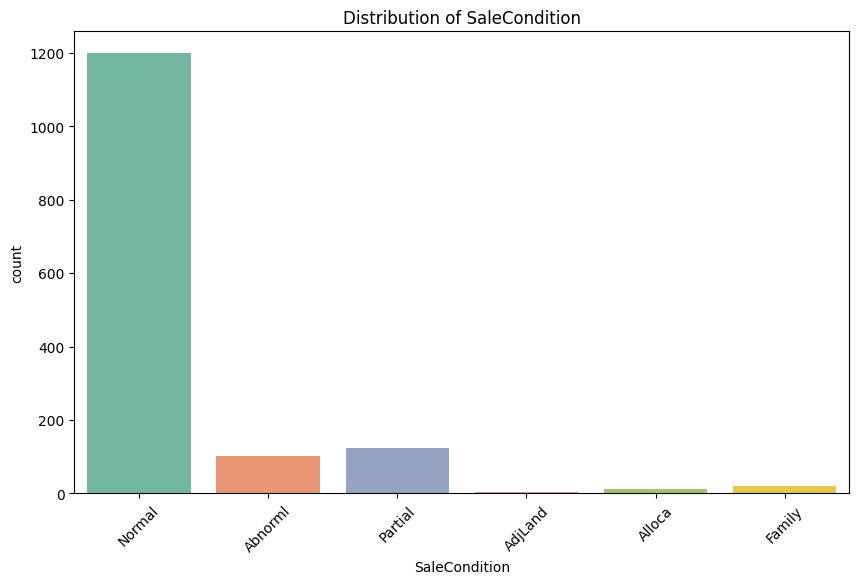

In [16]:
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data_train, palette='Set2', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

Удаляем колонки в которых преобладает одна категория

In [17]:
drop_cat_column = ['SaleCondition', 'SaleType', 'PavedDrive', 'GarageCond', 'GarageQual', 'Functional', 'Electrical',
                'CentralAir', 'Heating', 'BsmtFinType2', 'BsmtCond', 'ExterCond', 'RoofMatl', 'BldgType', 'Condition2',
                 'Condition1', 'LandSlope', 'Utilities', 'LandContour', 'Street', 'MSZoning']

data_train.drop(drop_cat_column, axis=1, inplace=True)

Смотрим на все значения NUM

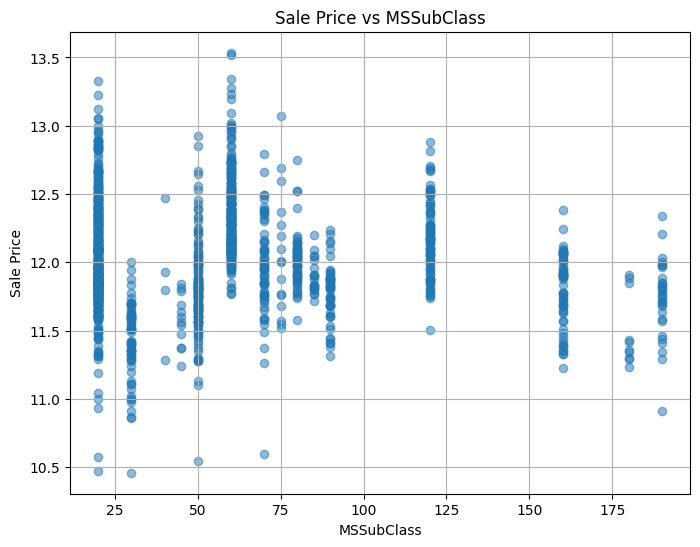

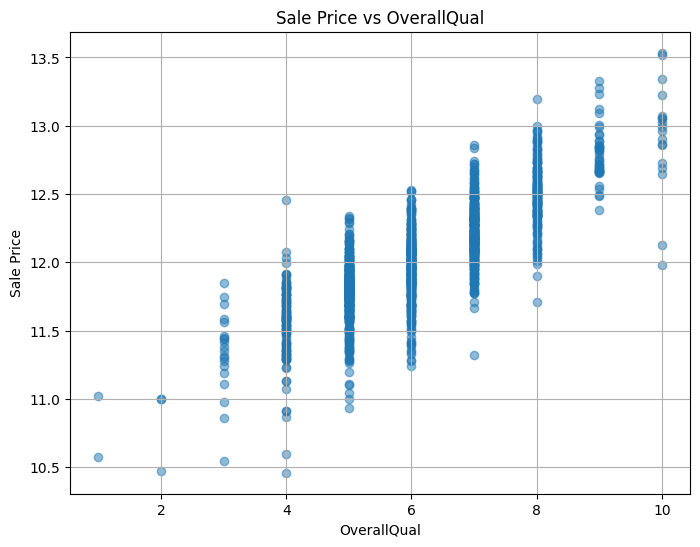

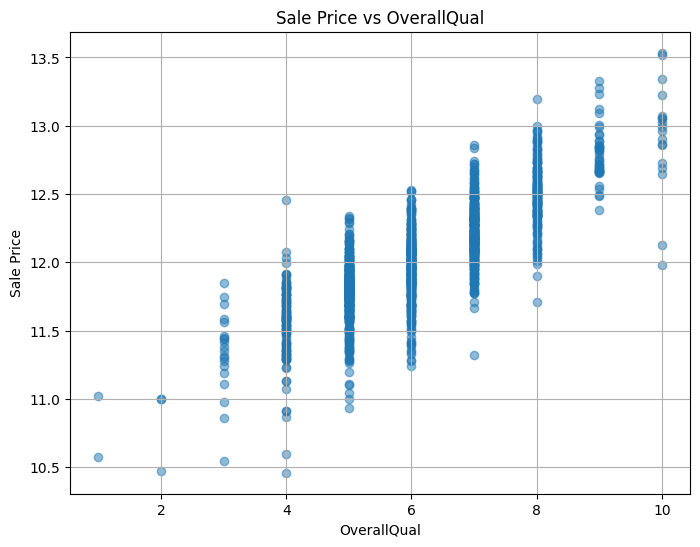

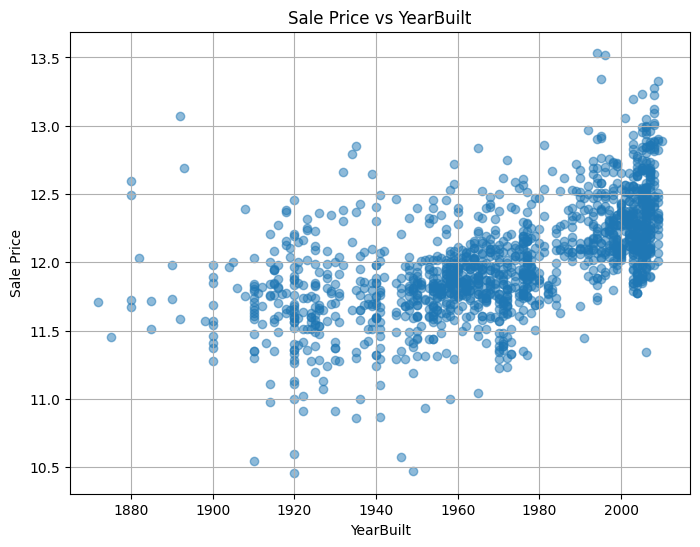

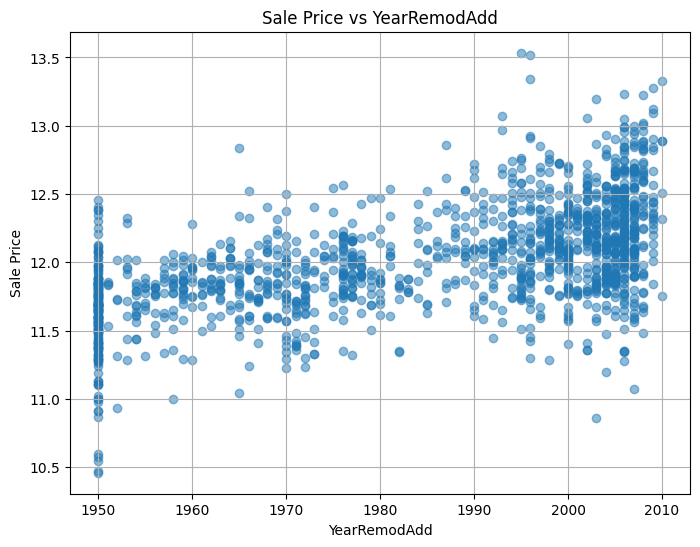

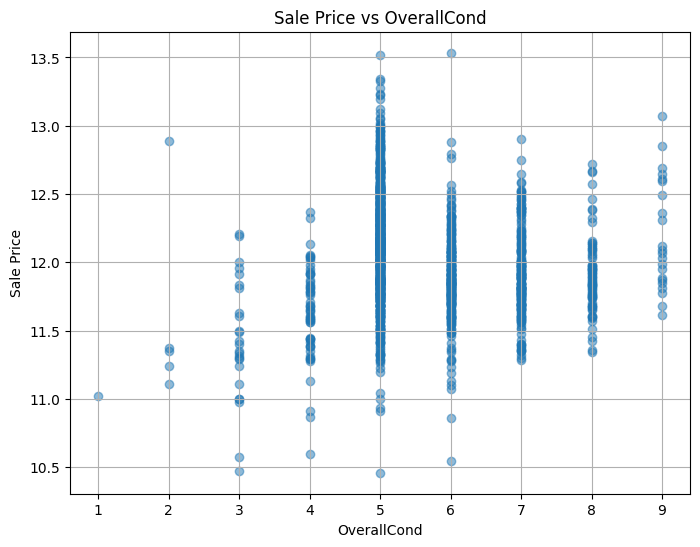

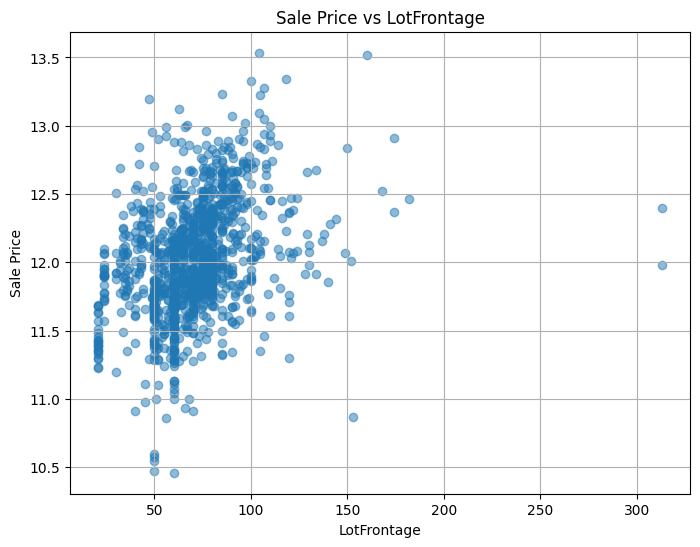

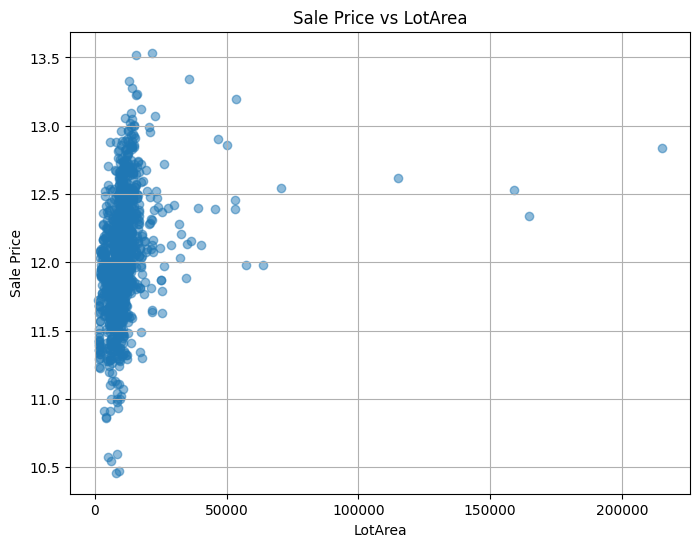

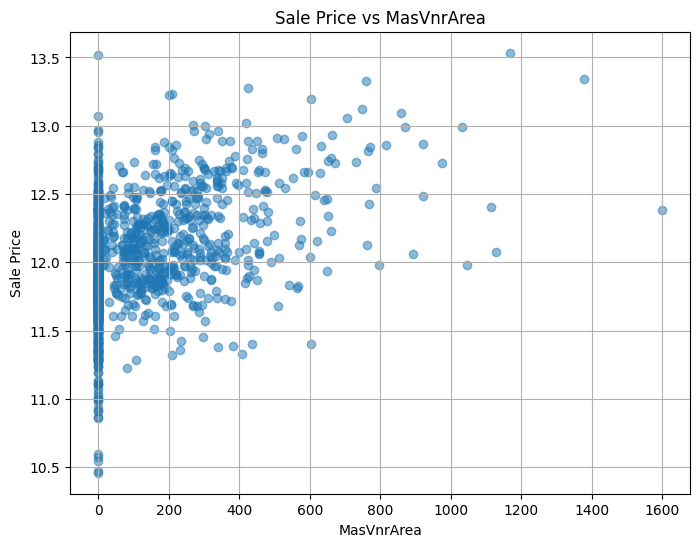

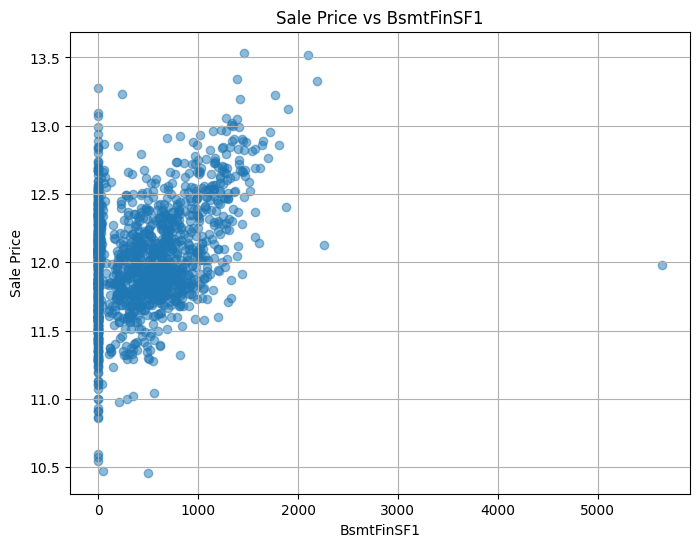

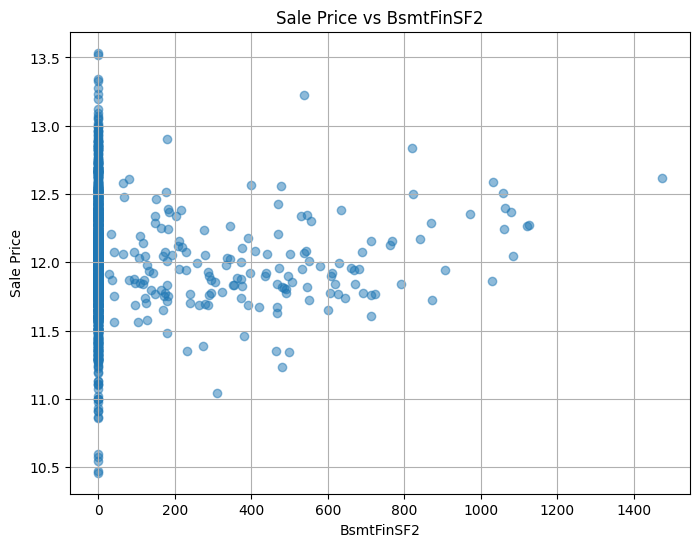

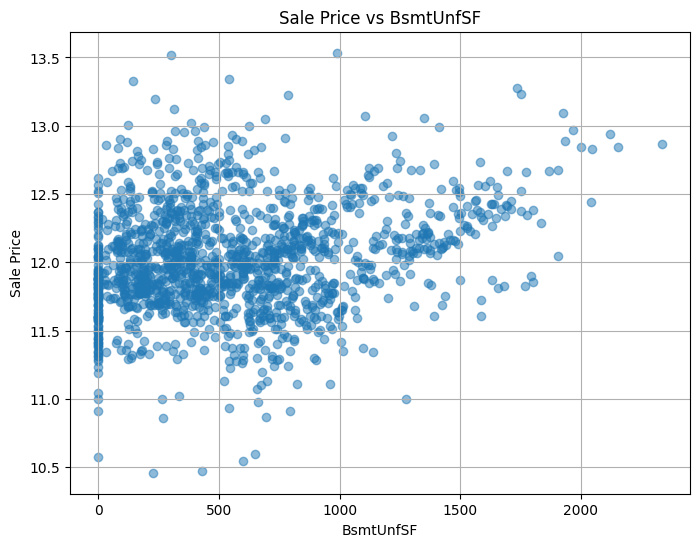

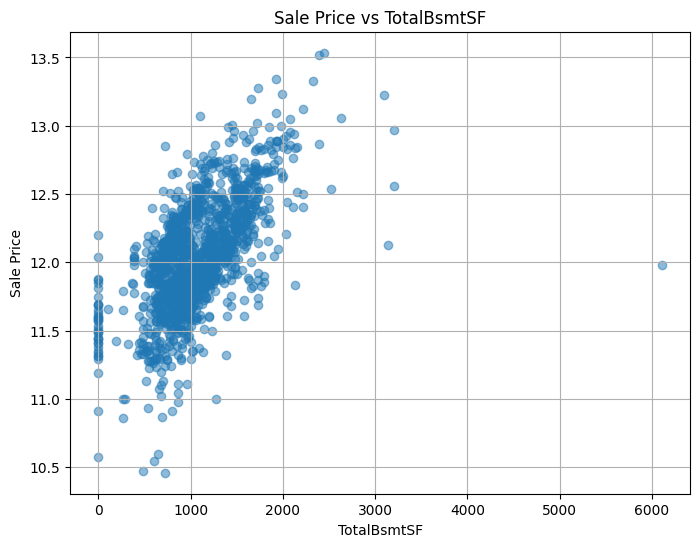

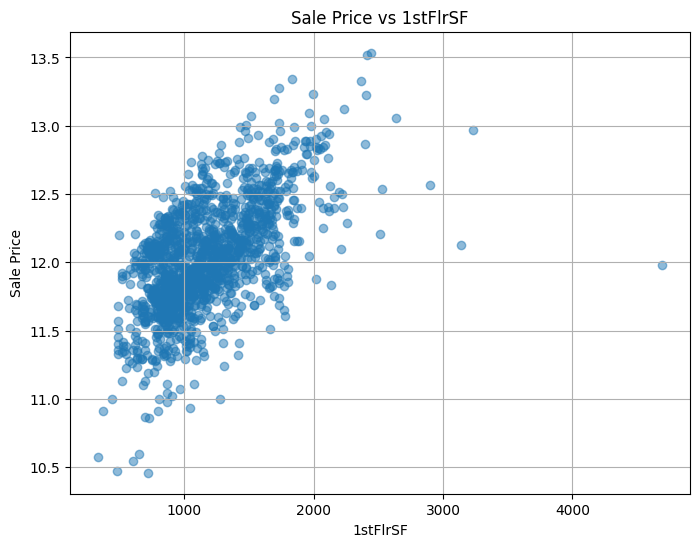

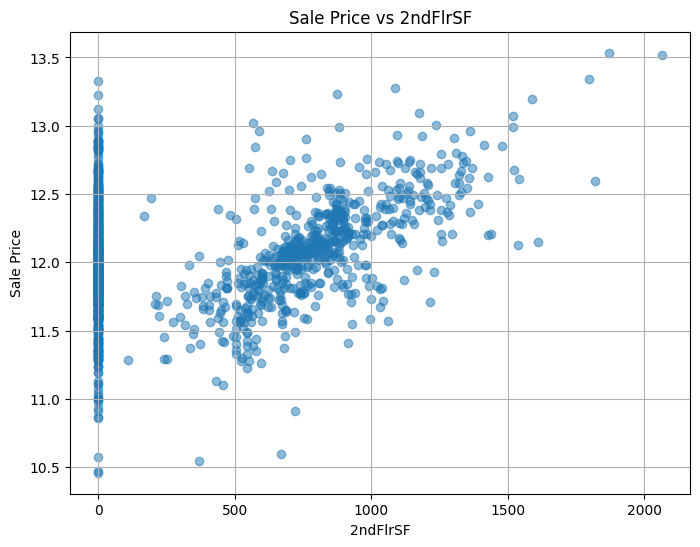

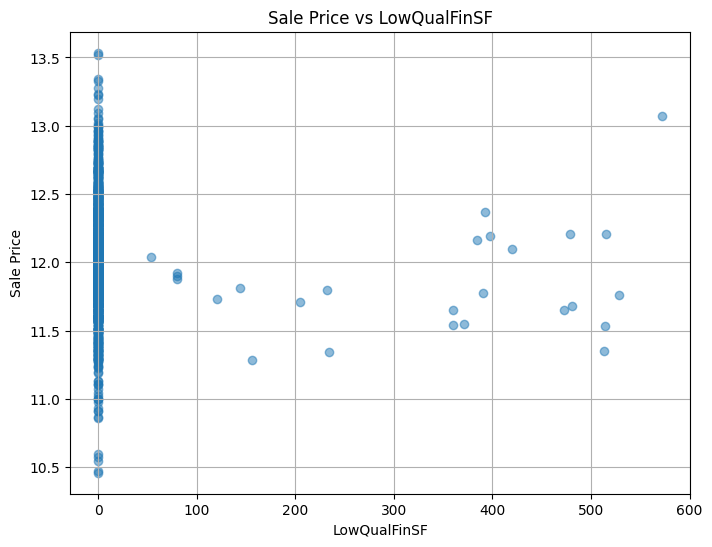

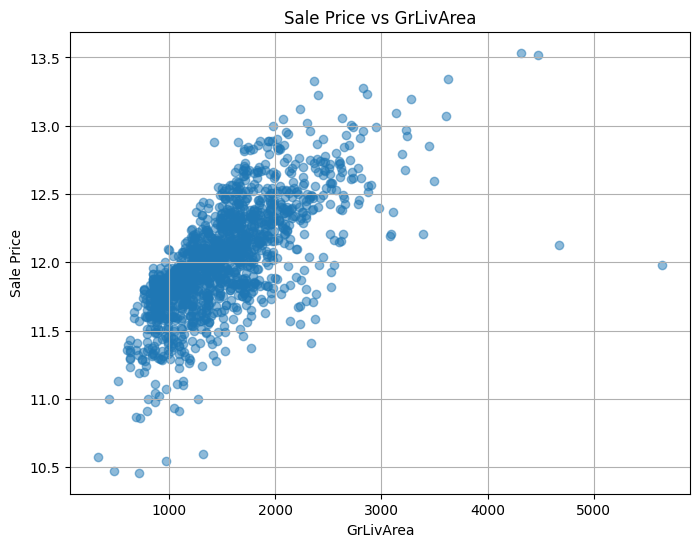

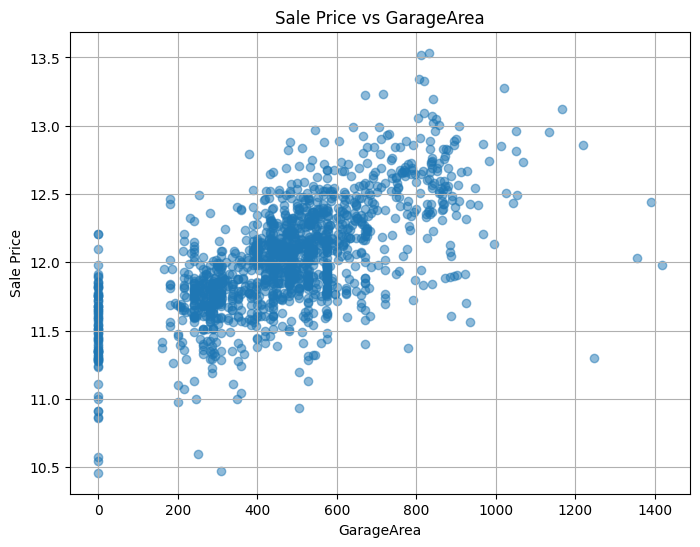

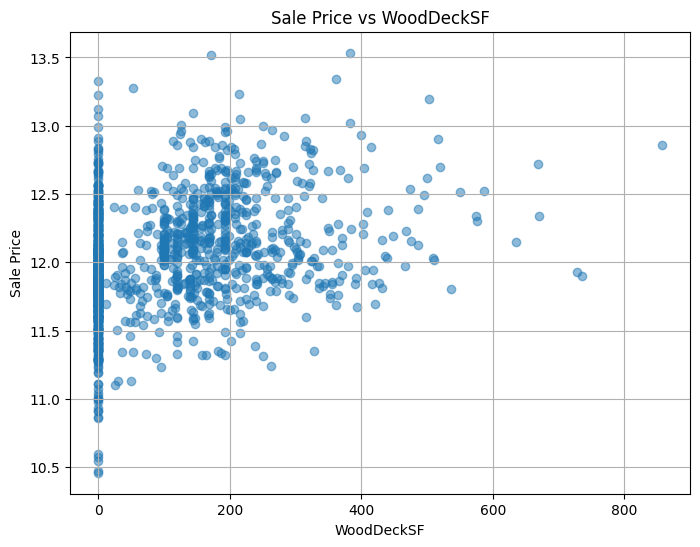

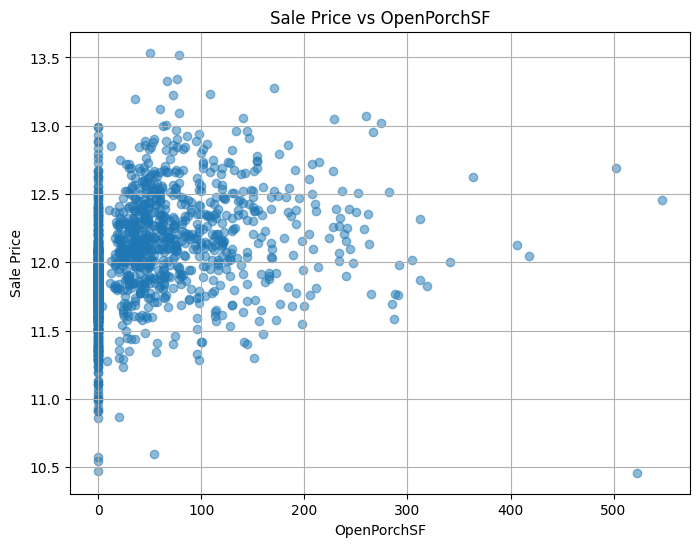

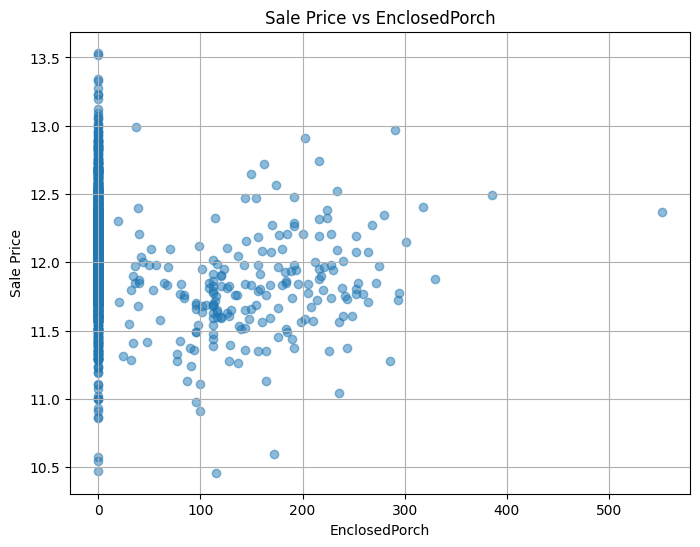

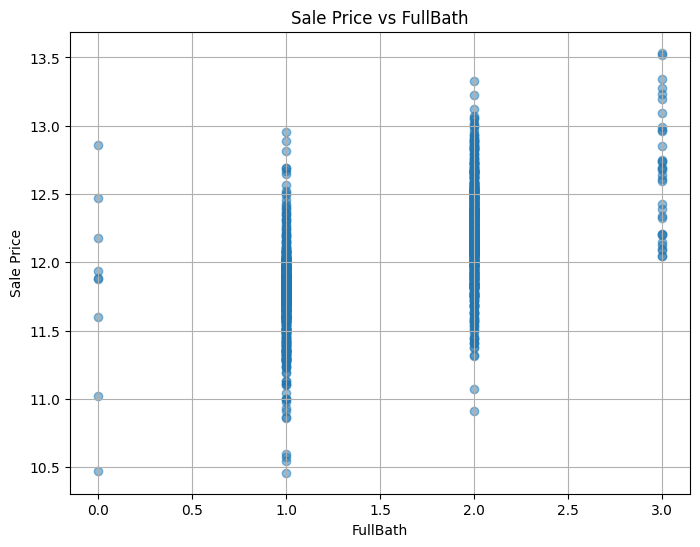

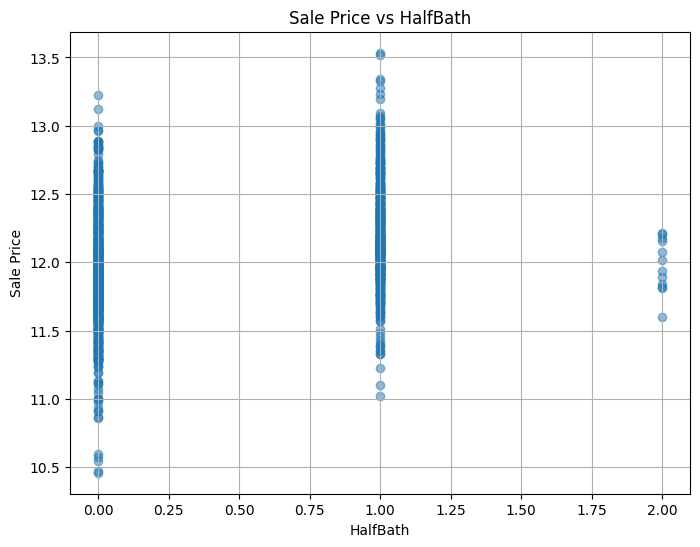

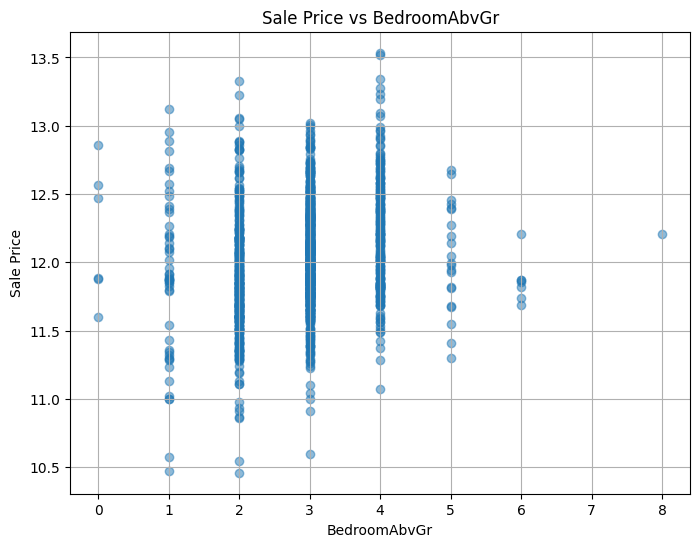

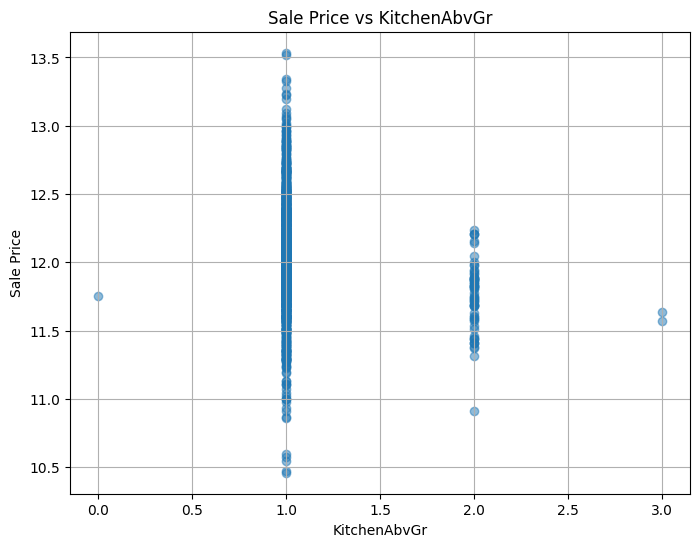

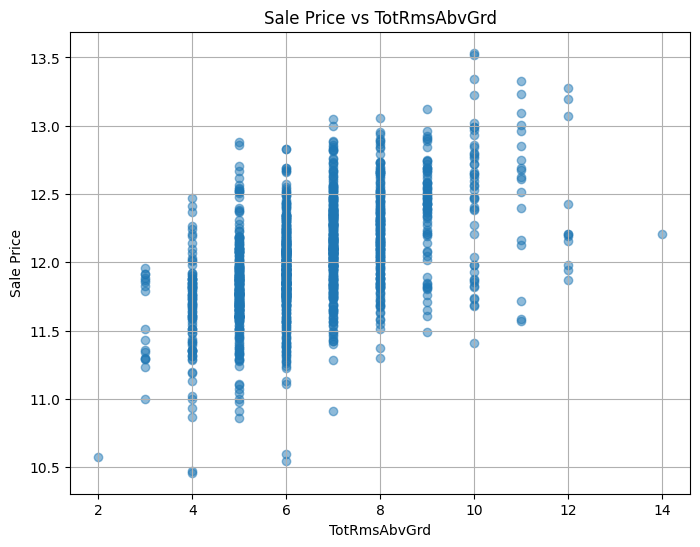

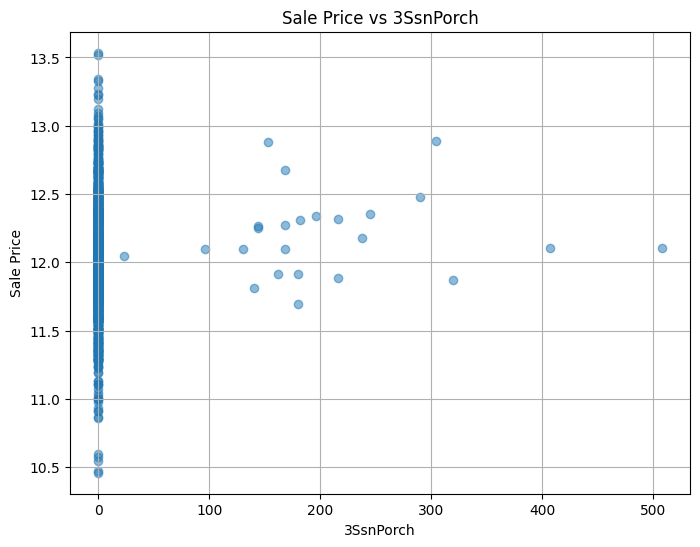

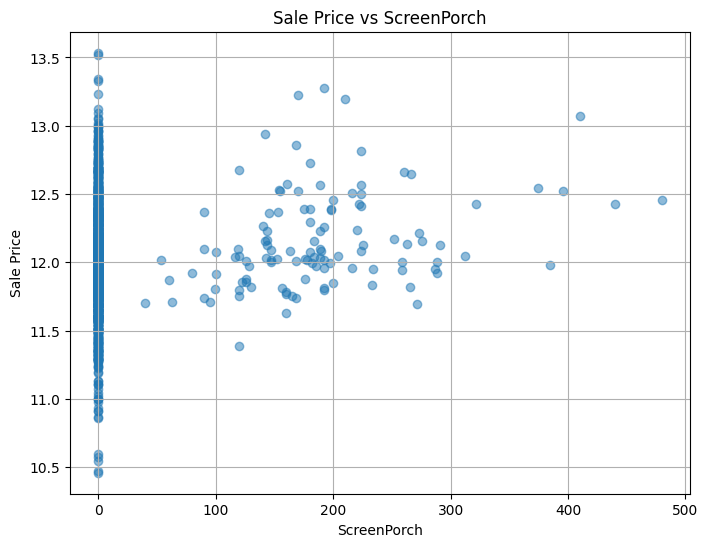

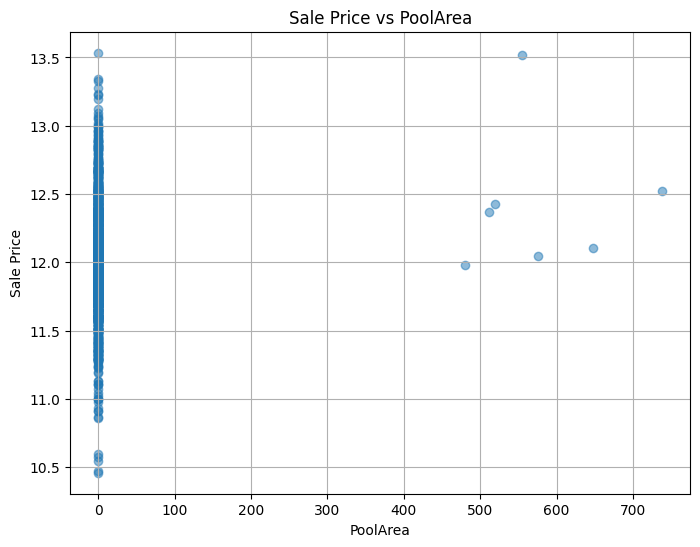

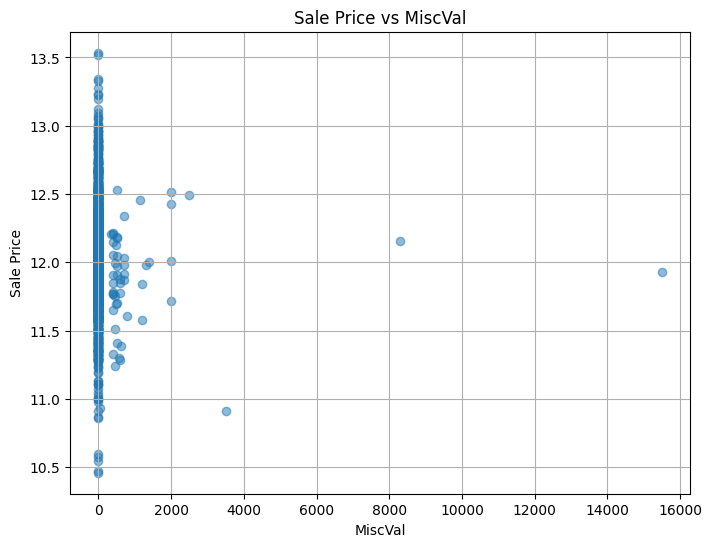

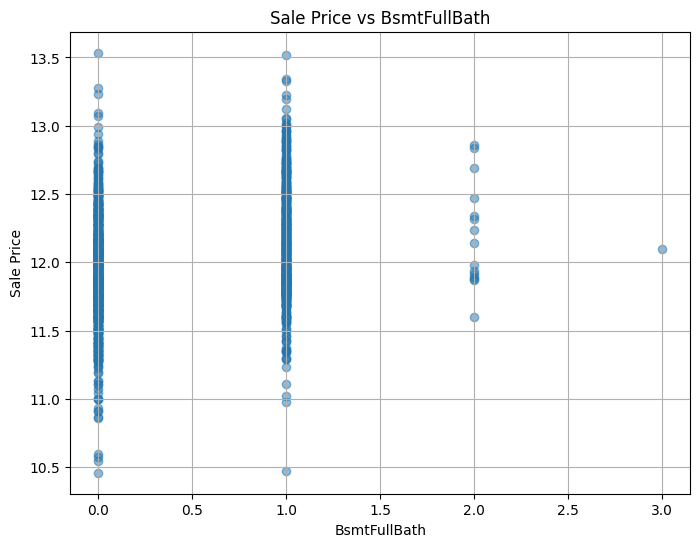

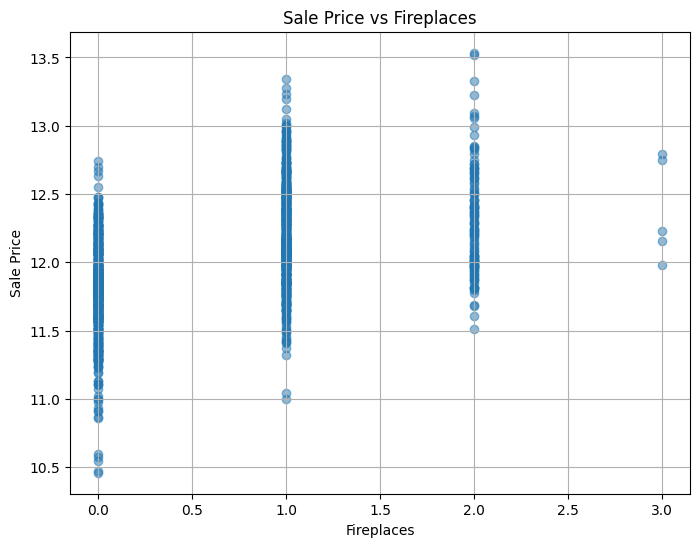

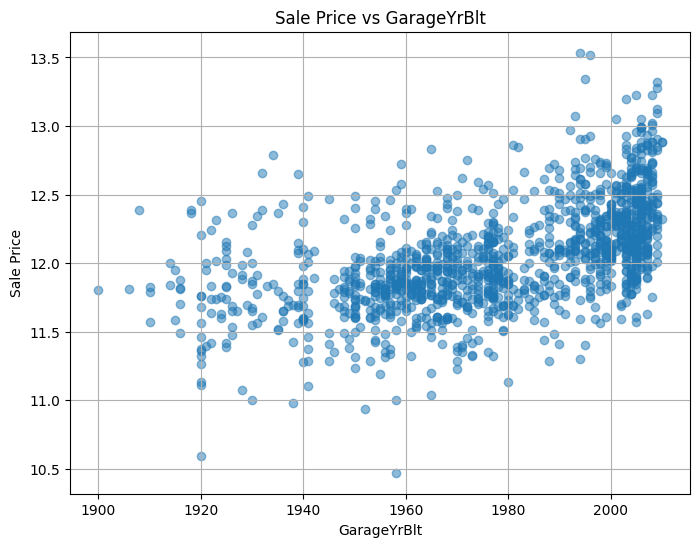

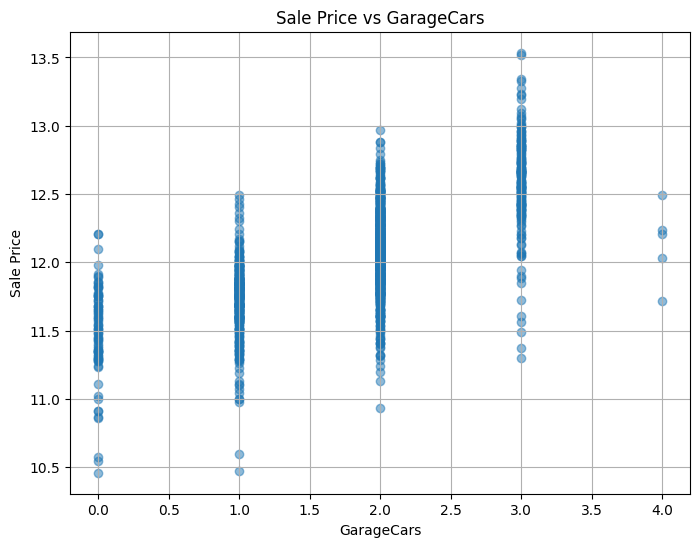

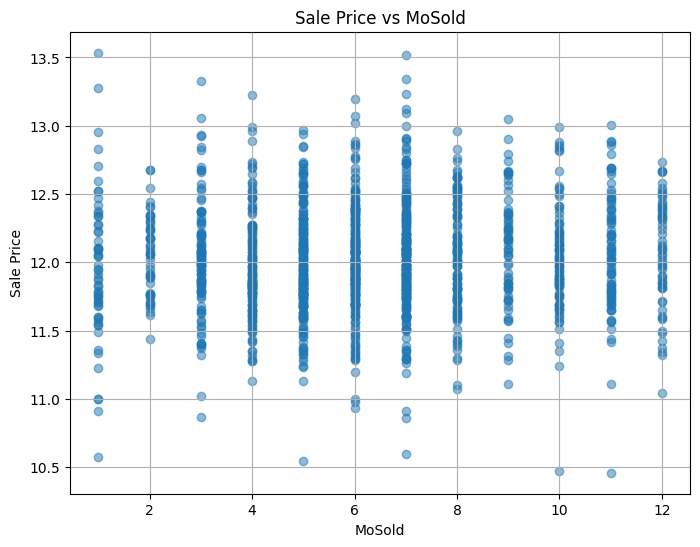

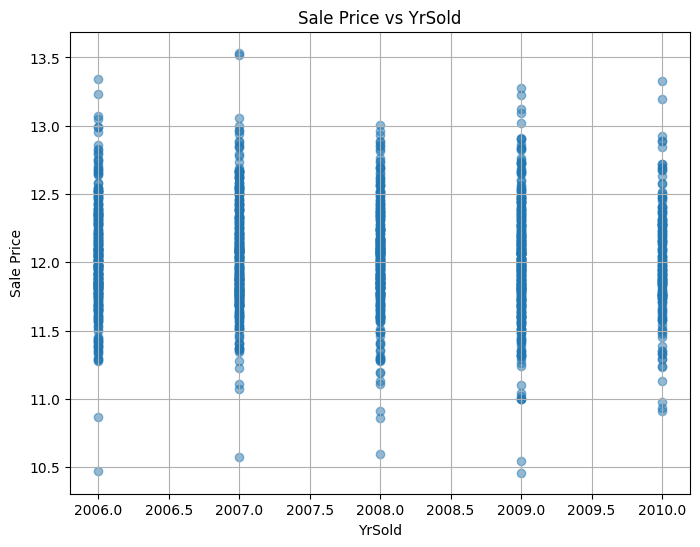

In [18]:
for feature in numeric_cols:
    if feature != 'SalePrice':
        plt.figure(figsize=(8, 6))
        plt.scatter(data_train[feature], data_train['SalePrice'], alpha=0.5)
        plt.title(f'Sale Price vs {feature}')
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.grid(True)
        plt.show()
        plt.close()

In [19]:
# Удаляем колонки которые не вносят значимости для целевой переменной.
drop_num_column = ['BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch',
                   'PoolArea', 'MiscVal', 'FullBath', 'HalfBath', 'LowQualFinSF', 'ScreenPorch', 'EnclosedPorch',
                   'BsmtFinSF2', 'MasVnrArea']

data_train.drop(drop_num_column, axis=1, inplace=True)

Удалим бесполезный столбец ID, а также столбцы с большим количеством null значений

In [20]:
data_train.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
Alley           1369
LotShape           0
LotConfig          0
Neighborhood       0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
ExterQual          0
Foundation         0
BsmtQual          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BedroomAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
PoolQC          1453
Fence           1179
MiscFeature     1406
MoSold             0
YrSold             0
SalePrice    

In [21]:
isnull_drop = ['Alley', 'MiscFeature', 'Fence', 'PoolQC', 'MasVnrType', 'FireplaceQu', 'Id']
data_train.drop(isnull_drop, axis=1, inplace=True)


In [22]:
data_train.isnull().sum()

MSSubClass        0
LotFrontage     259
LotArea           0
LotShape          0
LotConfig         0
Neighborhood      0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
ExterQual         0
Foundation        0
BsmtQual         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtUnfSF         0
TotalBsmtSF       0
HeatingQC         0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
BedroomAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Fireplaces        0
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

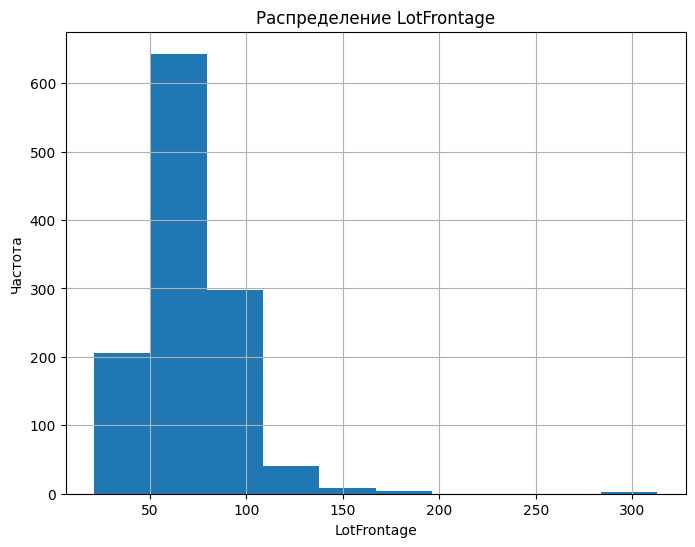

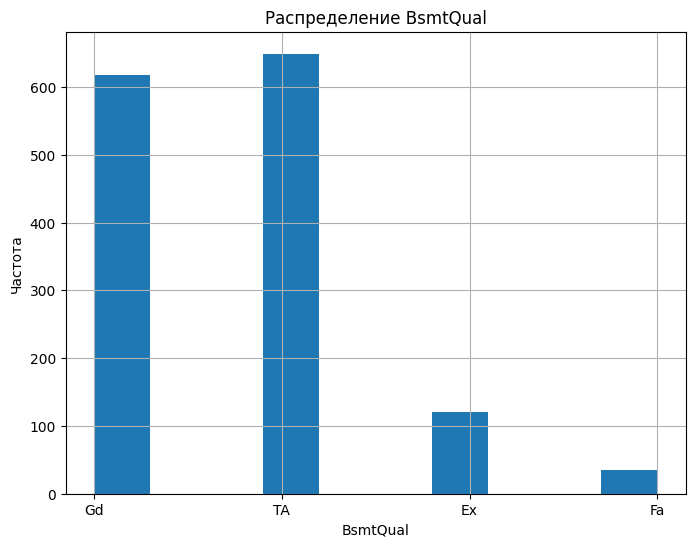

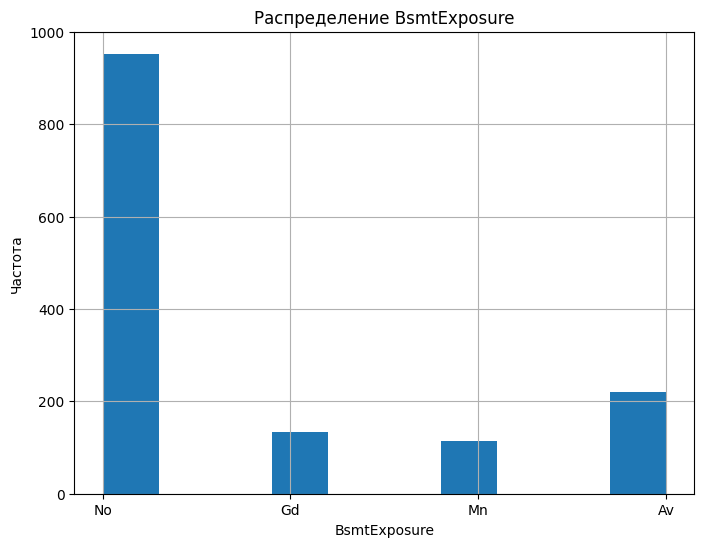

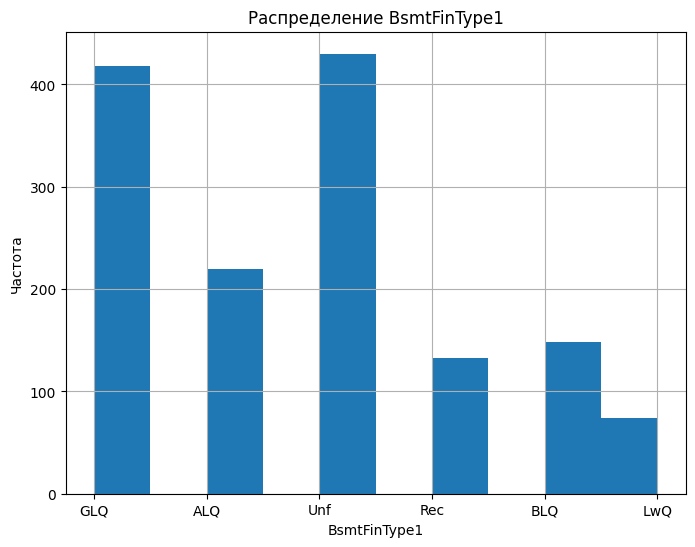

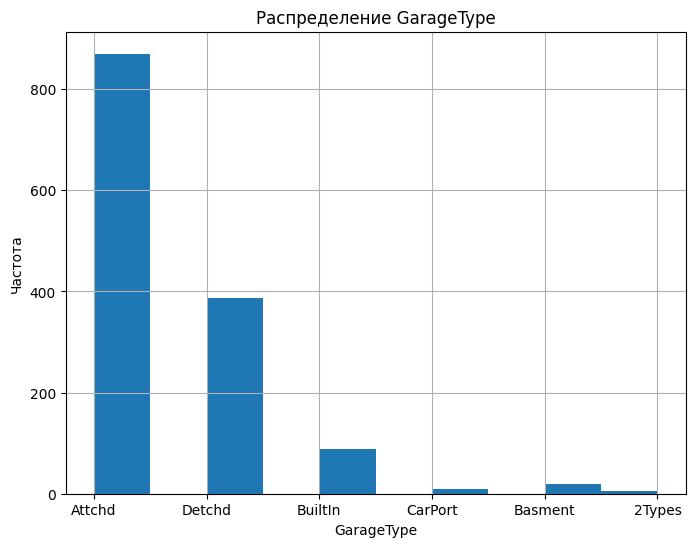

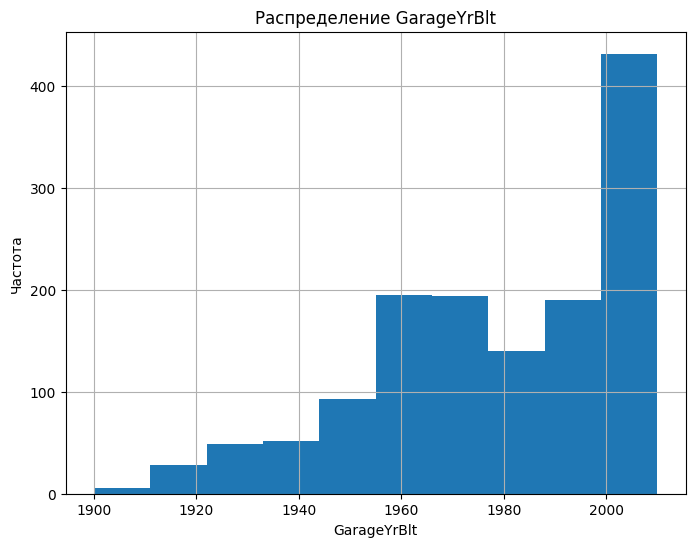

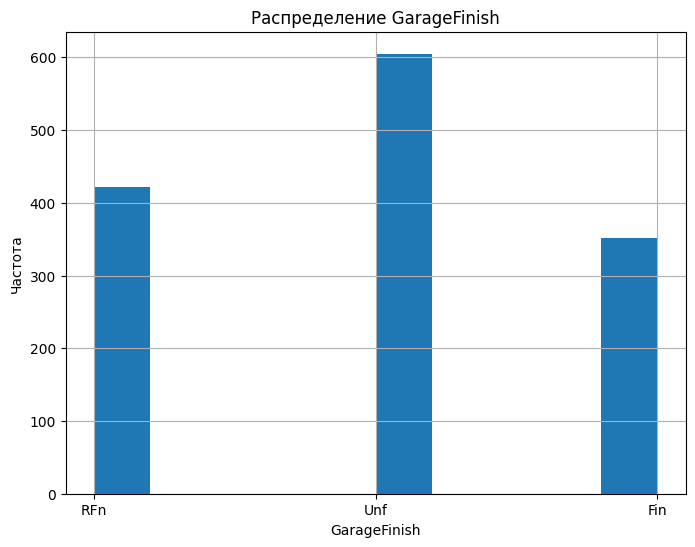

In [23]:
for col in data_train.columns[data_train.isnull().any()]:
    plt.figure(figsize=(8, 6))
    data_train[col].hist()
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()

In [24]:
print('Мода:', data_train['GarageFinish'].mode()[0])
print('Мода:', data_train['GarageType'].mode()[0])
print('Медиана:', data_train['GarageYrBlt'].median())
print('Медиана:', data_train['LotFrontage'].median())
print('Мода:', data_train['BsmtExposure'].mode()[0])
print('Мода:', data_train['BsmtQual'].mode()[0])
print('Мода:', data_train['BsmtFinType1'].mode()[0])

Мода: Unf
Мода: Attchd
Медиана: 1980.0
Медиана: 69.0
Мода: No
Мода: TA
Мода: Unf


В принципе можно заменить пропуски модой и медианой

In [25]:
data_train['GarageFinish'] = data_train['GarageFinish'].fillna(data_train['GarageFinish'].mode()[0])
data_train['GarageType'] = data_train['GarageType'].fillna(data_train['GarageType'].mode()[0])
data_train['GarageYrBlt'] = data_train['GarageYrBlt'].fillna(data_train['GarageYrBlt'].median())
data_train['LotFrontage'] = data_train['LotFrontage'].fillna(data_train['LotFrontage'].median())
data_train['BsmtExposure'] = data_train['BsmtExposure'].fillna(data_train['BsmtExposure'].mode()[0])
data_train['BsmtQual'] = data_train['BsmtQual'].fillna(data_train['BsmtQual'].mode()[0])
data_train['BsmtFinType1'] = data_train['BsmtFinType1'].fillna(data_train['BsmtFinType1'].mode()[0])


Теперь посмотрим на выбросы.

In [26]:
def outliers(column):  # подсчет количества выбросов будем смотреть по 5 и 95 квантилю
    Q1 = column.quantile(0.05)
    Q3 = column.quantile(0.95)
    IQR = Q3 - Q1
    min_out = Q1 - 1.5 * IQR
    max_out = Q3 + 1.5 * IQR
    return (column < min_out).sum() + (column > max_out).sum(), min_out, max_out

In [27]:
outliers_count = {}
outliers_info = {}

for col in data_train.columns:
    if data_train[col].dtype != 'object':  
        count, min_out, max_out = outliers(data_train[col])
        outliers_count[col] = count
        outliers_info[col] = {'min_out': min_out, 'max_out': max_out}

for col, count in outliers_count.items():
    print(f"Столбец '{col}': количество выбросов - {count}, минимальное значение без выбросов - {outliers_info[col]['min_out']}, максимальное значение без выбросов - {outliers_info[col]['max_out']}")

Столбец 'MSSubClass': количество выбросов - 0, минимальное значение без выбросов - -190.0, максимальное значение без выбросов - 370.0
Столбец 'LotFrontage': количество выбросов - 2, минимальное значение без выбросов - -66.12499999999999, максимальное значение без выбросов - 206.075
Столбец 'LotArea': количество выбросов - 15, минимальное значение без выбросов - -17822.474999999995, максимальное значение без выбросов - 38535.325
Столбец 'OverallQual': количество выбросов - 0, минимальное значение без выбросов - -2.0, максимальное значение без выбросов - 14.0
Столбец 'OverallCond': количество выбросов - 0, минимальное значение без выбросов - -2.0, максимальное значение без выбросов - 14.0
Столбец 'YearBuilt': количество выбросов - 0, минимальное значение без выбросов - 1779.5, максимальное значение без выбросов - 2143.5
Столбец 'YearRemodAdd': количество выбросов - 0, минимальное значение без выбросов - 1864.5, максимальное значение без выбросов - 2092.5
Столбец 'BsmtFinSF1': количество 

В принципе выбросов в данных квантилях очень мало не будем никак их трогать, делать 1 квартиль и 3 квартиль смысла не вижу.

Сделаем препроцессинг перед загрузкой данных в модель.


Обработаю cat признаки через labelencoder

In [28]:
data_train.head(1).T

0
MSSubClass           60
LotFrontage        65.0
LotArea            8450
LotShape            Reg
LotConfig        Inside
Neighborhood    CollgCr
HouseStyle       2Story
OverallQual           7
OverallCond           5
YearBuilt          2003
YearRemodAdd       2003
RoofStyle         Gable
Exterior1st     VinylSd
Exterior2nd     VinylSd
ExterQual            Gd
Foundation        PConc
BsmtQual             Gd
BsmtExposure         No
BsmtFinType1        GLQ
BsmtFinSF1          706
BsmtUnfSF           150
TotalBsmtSF         856
HeatingQC            Ex
1stFlrSF            856
2ndFlrSF            854
GrLivArea          1710
BsmtFullBath          1
BedroomAbvGr          3
KitchenQual          Gd
TotRmsAbvGrd          8
Fireplaces            0
GarageType       Attchd
GarageYrBlt      2003.0
GarageFinish        RFn
GarageCars            2
GarageArea          548
WoodDeckSF            0
OpenPorchSF          61
MoSold                2
YrSold             2008
SalePrice     12.247699

In [29]:
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [30]:
label_encoder = LabelEncoder()
# Вычитаем из cat_cols - drop_cat_column - isnull_drop_set
cat_cols_set = set(cat_cols)
drop_cat_column_set = set(drop_cat_column)
isnull_drop_set = set(isnull_drop)
remaining_cat_columns = list(cat_cols_set - drop_cat_column_set - isnull_drop_set)


In [31]:
for i in remaining_cat_columns:
    label_encoder.fit(data_train[i])
    data_train[i] = label_encoder.transform(data_train[i])

In [32]:
data_train.head(1)

MSSubClass  LotFrontage  LotArea  LotShape  LotConfig  Neighborhood  \
0          60         65.0     8450         3          4             5   

   HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType  \
0           5            7            5       2003  ...           1   

   GarageYrBlt  GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0             1           2         548           0           61   

   MoSold  YrSold  SalePrice  
0       2    2008  12.247699  

[1 rows x 41 columns]

Добавим метрики оценки модели

In [33]:
def count_metrics(y_test, y_pred):
    metrics = {}
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics['mse'] = mse
    metrics['rmse'] = rmse
    metrics['mae'] = mae
    metrics['r2'] = r2
    return metrics

def show_metrics(metrics):
    print("MSE:", metrics['mse'])
    print("RMSE:", metrics['rmse'])
    print("MAE:", metrics['mae'])
    print("R2:", metrics['r2'])

In [34]:
X = data_train.drop(['SalePrice'], axis=1).values
Y = data_train['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [35]:
# Само обучение модели линейной регрессии
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

# Посчитаем метрики
metrics_linear = count_metrics(y_test, y_pred_linear)
show_metrics(metrics_linear)

MSE: 0.024356239712338704
RMSE: 0.15606485739056922
MAE: 0.11214169577375872
R2: 0.8694812138529642


Из-за того что целевая переменная была логарифмирована, чтобы достичь нормального распределения стоит использовать экспоненциальное преобразование для получения нативных значений.


In [36]:
y_pred_original_scale = np.exp(y_pred_linear)

Метрики получились хорошие, теперь проведем преобразование тест выборки и используем модель на ней.

In [37]:
drop_cat_column = ['SaleCondition', 'SaleType', 'PavedDrive', 'GarageCond', 'GarageQual', 'Functional', 'Electrical',
                'CentralAir', 'Heating', 'BsmtFinType2', 'BsmtCond', 'ExterCond', 'RoofMatl', 'BldgType', 'Condition2',
                 'Condition1', 'LandSlope', 'Utilities', 'LandContour', 'Street', 'MSZoning']

data_test.drop(drop_cat_column, axis=1, inplace=True)

# Удаляем колонки которые не вносят значимости для целевой переменной.
drop_num_column = ['BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch',
                   'PoolArea', 'MiscVal', 'FullBath', 'HalfBath', 'LowQualFinSF', 'ScreenPorch', 'EnclosedPorch',
                   'BsmtFinSF2', 'MasVnrArea']

data_test.drop(drop_num_column, axis=1, inplace=True)

isnull_drop = ['Alley', 'MiscFeature', 'Fence', 'PoolQC', 'MasVnrType', 'FireplaceQu', 'Id']
data_test.drop(isnull_drop, axis=1, inplace=True)

data_test['GarageFinish'] = data_test['GarageFinish'].fillna(data_test['GarageFinish'].mode()[0])
data_test['GarageType'] = data_test['GarageType'].fillna(data_test['GarageType'].mode()[0])
data_test['GarageYrBlt'] = data_test['GarageYrBlt'].fillna(data_test['GarageYrBlt'].median())
data_test['LotFrontage'] = data_test['LotFrontage'].fillna(data_test['LotFrontage'].median())
data_test['BsmtExposure'] = data_test['BsmtExposure'].fillna(data_test['BsmtExposure'].mode()[0])
data_test['BsmtQual'] = data_test['BsmtQual'].fillna(data_test['BsmtQual'].mode()[0])
data_test['BsmtFinType1'] = data_test['BsmtFinType1'].fillna(data_test['BsmtFinType1'].mode()[0])


In [38]:
data_test.isnull().sum()

MSSubClass      0
LotFrontage     0
LotArea         0
LotShape        0
LotConfig       0
Neighborhood    0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
Exterior1st     1
Exterior2nd     1
ExterQual       0
Foundation      0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      1
BsmtUnfSF       1
TotalBsmtSF     1
HeatingQC       0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    2
BedroomAbvGr    0
KitchenQual     1
TotRmsAbvGrd    0
Fireplaces      0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      1
GarageArea      1
WoodDeckSF      0
OpenPorchSF     0
MoSold          0
YrSold          0
dtype: int64

Заполним пропуски

In [39]:
data_test['Exterior1st'] = data_test['Exterior1st'].fillna(data_test['Exterior1st'].mode()[0])
data_test['Exterior2nd'] = data_test['Exterior2nd'].fillna(data_test['Exterior2nd'].mode()[0])
data_test['BsmtFinSF1'] = data_test['BsmtFinSF1'].fillna(data_test['BsmtFinSF1'].median())
data_test['BsmtUnfSF'] = data_test['BsmtUnfSF'].fillna(data_test['BsmtUnfSF'].median())
data_test['TotalBsmtSF'] = data_test['TotalBsmtSF'].fillna(data_test['TotalBsmtSF'].median())
data_test['BsmtFullBath'] = data_test['BsmtFullBath'].fillna(data_test['BsmtFullBath'].mode()[0])
data_test['KitchenQual'] = data_test['KitchenQual'].fillna(data_test['KitchenQual'].mode()[0])
data_test['GarageCars'] = data_test['GarageCars'].fillna(data_test['GarageCars'].median())
data_test['GarageArea'] = data_test['GarageArea'].fillna(data_test['GarageArea'].mode()[0])

In [40]:
data_test.isnull().sum().sum()

0

На всякий случай проверю выбросы.

In [41]:
outliers_count = {}
outliers_info = {}

for col in data_test.columns:
    if data_test[col].dtype != 'object':  
        count, min_out, max_out = outliers(data_test[col])
        outliers_count[col] = count
        outliers_info[col] = {'min_out': min_out, 'max_out': max_out}

for col, count in outliers_count.items():
    print(f"Столбец '{col}': количество выбросов - {count}, минимальное значение без выбросов - {outliers_info[col]['min_out']}, максимальное значение без выбросов - {outliers_info[col]['max_out']}")

Столбец 'MSSubClass': количество выбросов - 0, минимальное значение без выбросов - -190.0, максимальное значение без выбросов - 370.0
Столбец 'LotFrontage': количество выбросов - 0, минимальное значение без выбросов - -75.0, максимальное значение без выбросов - 213.0
Столбец 'LotArea': количество выбросов - 9, минимальное значение без выбросов - -17595.749999999993, максимальное значение без выбросов - 37554.249999999985
Столбец 'OverallQual': количество выбросов - 0, минимальное значение без выбросов - -3.5, максимальное значение без выбросов - 16.5
Столбец 'OverallCond': количество выбросов - 0, минимальное значение без выбросов - -2.0, максимальное значение без выбросов - 14.0
Столбец 'YearBuilt': количество выбросов - 0, минимальное значение без выбросов - 1777.0, максимальное значение без выбросов - 2145.0
Столбец 'YearRemodAdd': количество выбросов - 0, минимальное значение без выбросов - 1864.5, максимальное значение без выбросов - 2092.5
Столбец 'BsmtFinSF1': количество выбросо

In [42]:
# Вычитаем из cat_cols - drop_cat_column - isnull_drop_set
cat_cols_set = set(cat_cols)
drop_cat_column_set = set(drop_cat_column)
isnull_drop_set = set(isnull_drop)
remaining_cat_columns = list(cat_cols_set - drop_cat_column_set - isnull_drop_set)


In [43]:
for i in remaining_cat_columns:
    label_encoder.fit(data_test[i])
    data_test[i] = label_encoder.transform(data_test[i])

In [44]:
data_test.head(1).T

0
MSSubClass       20.0
LotFrontage      80.0
LotArea       11622.0
LotShape          3.0
LotConfig         4.0
Neighborhood     12.0
HouseStyle        2.0
OverallQual       5.0
OverallCond       6.0
YearBuilt      1961.0
YearRemodAdd   1961.0
RoofStyle         1.0
Exterior1st      10.0
Exterior2nd      12.0
ExterQual         3.0
Foundation        1.0
BsmtQual          3.0
BsmtExposure      3.0
BsmtFinType1      4.0
BsmtFinSF1      468.0
BsmtUnfSF       270.0
TotalBsmtSF     882.0
HeatingQC         4.0
1stFlrSF        896.0
2ndFlrSF          0.0
GrLivArea       896.0
BsmtFullBath      0.0
BedroomAbvGr      2.0
KitchenQual       3.0
TotRmsAbvGrd      5.0
Fireplaces        0.0
GarageType        1.0
GarageYrBlt    1961.0
GarageFinish      2.0
GarageCars        1.0
GarageArea      730.0
WoodDeckSF      140.0
OpenPorchSF       0.0
MoSold            6.0
YrSold         2010.0

Использование обученной модели на данных.

In [45]:
y_pred_test = model_linear.predict(data_test)

C:\Users\Илья\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [46]:
y_pred_original_scale = np.exp(y_pred_test)

In [47]:
submission = pd.read_csv('test.csv')

In [49]:
submission['SalePrice'] = y_pred_original_scale

In [50]:
submission.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN        Gar2   12500   
2         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         HLS    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  Predicted_SalePrice  
0      6   2010        WD         Normal        109891.420482  
1      6   2010        WD         Normal        142889.782103  
2      3   2010        WD         Normal        166344.607515  
3      6   2010        WD         Normal        191161.127341  
4      1   2010        WD         Normal        185244.145332  

[5 rows x 81 columns]

Полученые предсказания выводим в dataset submission.